In [1]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('./data/processed/combined_hospital_data.csv')
df.head()

,facility_id,facility_name,address,citytown,state,zip_code,countyparish,telephone_number,payment_measure_id,payment_measure_name,...,count,results,schema,keys,format,rowIds,properties,city,name,rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dothan,Southeast Health Medical Center,70.0
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Southeast Health Medical Center,70.0
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eufaula,Southeast Health Medical Center,70.0
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geneva,Southeast Health Medical Center,70.0
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ozark,Southeast Health Medical Center,70.0


In [18]:
import re

for col in ['name', 'facility_name']:
    df[col] = df[col].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)

In [13]:
len(df['facility_name'].unique()), len(df['name'].unique())

(195, 195)

In [20]:
len(df[df['facility_name'] != df['name']])

0

In [26]:
charges = pd.read_csv('./data/raw/charges_data.csv', encoding='latin1')
charges.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,25,158541.640000,37331.000000,35332.960000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,18,107085.333330,25842.666667,23857.944444
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,18,156326.777780,32167.888889,27662.944444
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,19,112085.263160,11568.473684,9993.473684
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,33,89068.212121,8199.818182,6086.393939


In [27]:
charges.columns

Index(['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_City',
       'Rndrng_Prvdr_St', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5',
       'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs',
       'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt'],
      dtype='object')

In [28]:
df.columns

Index(['facility_id', 'facility_name', 'address', 'citytown', 'state',
       'zip_code', 'countyparish', 'telephone_number', 'payment_measure_id',
       'payment_measure_name', 'payment_category', 'denominator', 'payment',
       'lower_estimate', 'higher_estimate', 'payment_footnote',
       'value_of_care_display_id', 'value_of_care_display_name',
       'value_of_care_category', 'value_of_care_footnote', 'start_date',
       'end_date', '6cfce155-48b6-579e-90ed-24016c759350', 'resources',
       'limit', 'offset', 'count', 'results', 'schema', 'keys', 'format',
       'rowIds', 'properties', 'city', 'name', 'rating'],
      dtype='object')

In [29]:
import pandas as pd


# Rename columns to align
df = df.rename(columns={
    'facility_id': 'Rndrng_Prvdr_CCN',
    'facility_name': 'facility_name_full',
    'citytown': 'facility_city',
    'state': 'facility_state',
    'zip_code': 'facility_zip'
})

# Make sure IDs are strings for joining
charges['Rndrng_Prvdr_CCN'] = charges['Rndrng_Prvdr_CCN'].astype(str)
df['Rndrng_Prvdr_CCN'] = df['Rndrng_Prvdr_CCN'].astype(str)

# Perform the join
merged_df = charges.merge(
    df,
    on='Rndrng_Prvdr_CCN',
    how='left',
    suffixes=('_provider', '_facility')
)

# Optional: if some are still unmatched, you could fuzzy match by name and zip
# (this would be a secondary step)

# Save the result
merged_df.to_csv('./data/processed/merged_healthcare_data.csv', index=False)
merged_df.head()


,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,...,count,results,schema,keys,format,rowIds,properties,city,name,rating
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dothan,southeast health medical center,70.0
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,southeast health medical center,70.0
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eufaula,southeast health medical center,70.0
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geneva,southeast health medical center,70.0
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ozark,southeast health medical center,70.0


In [3]:
merged_df = pd.read_csv('./data/processed/merged_healthcare_data.csv') 
merged_df.head()

C:\Users\yash\AppData\Local\Temp\ipykernel_5344\509674613.py:1: DtypeWarning: Columns (15,16,17,18,20,21,22,23,24,25,30,31,32,34,35,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('./data/processed/merged_healthcare_data.csv')


,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,...,count,results,schema,keys,format,rowIds,properties,city,name,rating
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dothan,southeast health medical center,70.0
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,southeast health medical center,70.0
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eufaula,southeast health medical center,70.0
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geneva,southeast health medical center,70.0
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ozark,southeast health medical center,70.0


In [4]:
merged_df.shape

(522260, 50)

In [6]:
# Check if a column in dataframe has all na values and drop it
merged_df = merged_df.dropna(axis=1, how='all')
merged_df.shape

(522260, 39)

In [7]:
merged_df.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,...,payment_footnote,value_of_care_display_id,value_of_care_display_name,value_of_care_category,value_of_care_footnote,start_date,end_date,city,name,rating
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,MORT_PAYM_30_AMI,Value of Care Heart Attack measure,Average Mortality and Average Payment,NaN,07/01/2020,06/30/2023,Dothan,southeast health medical center,70.0
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,MORT_PAYM_30_AMI,Value of Care Heart Attack measure,Average Mortality and Average Payment,NaN,07/01/2020,06/30/2023,Enterprise,southeast health medical center,70.0
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,MORT_PAYM_30_AMI,Value of Care Heart Attack measure,Average Mortality and Average Payment,NaN,07/01/2020,06/30/2023,Eufaula,southeast health medical center,70.0
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,MORT_PAYM_30_AMI,Value of Care Heart Attack measure,Average Mortality and Average Payment,NaN,07/01/2020,06/30/2023,Geneva,southeast health medical center,70.0
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,MORT_PAYM_30_AMI,Value of Care Heart Attack measure,Average Mortality and Average Payment,NaN,07/01/2020,06/30/2023,Ozark,southeast health medical center,70.0


In [8]:
print(merged_df['rating'].isna().value_counts())
print(merged_df['payment'].isna().value_counts())

rating
False    307620
True     214640
Name: count, dtype: int64
payment
False    336535
True     185725
Name: count, dtype: int64


In [9]:
merged_df.columns

Index(['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_City',
       'Rndrng_Prvdr_St', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5',
       'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs',
       'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt',
       'facility_name_full', 'address', 'facility_city', 'facility_state',
       'facility_zip', 'countyparish', 'telephone_number',
       'payment_measure_id', 'payment_measure_name', 'payment_category',
       'denominator', 'payment', 'lower_estimate', 'higher_estimate',
       'payment_footnote', 'value_of_care_display_id',
       'value_of_care_display_name', 'value_of_care_category',
       'value_of_care_footnote', 'start_date', 'end_date', 'city', 'name',
       'rating'],
      dtype='object')

In [14]:
df = merged_df.copy()
filtered_df = df.dropna(subset=['Avg_Submtd_Cvrd_Chrg', 'rating'])

# Missing Value Analysis


Missing Value Percentage by Column:
value_of_care_footnote        88.234510
payment_footnote              87.492686
payment                       11.729731
lower_estimate                11.729731
higher_estimate               11.729731
Rndrng_Prvdr_Org_Name          0.000000
Rndrng_Prvdr_CCN               0.000000
Rndrng_Prvdr_State_Abrvtn      0.000000
Rndrng_Prvdr_Zip5              0.000000
Rndrng_Prvdr_State_FIPS        0.000000
Rndrng_Prvdr_St                0.000000
Rndrng_Prvdr_City              0.000000
Rndrng_Prvdr_RUCA              0.000000
DRG_Cd                         0.000000
Rndrng_Prvdr_RUCA_Desc         0.000000
facility_name_full             0.000000
address                        0.000000
facility_city                  0.000000
DRG_Desc                       0.000000
Tot_Dschrgs                    0.000000
Avg_Submtd_Cvrd_Chrg           0.000000
Avg_Tot_Pymt_Amt               0.000000
Avg_Mdcr_Pymt_Amt              0.000000
payment_measure_id             0.000000
tel

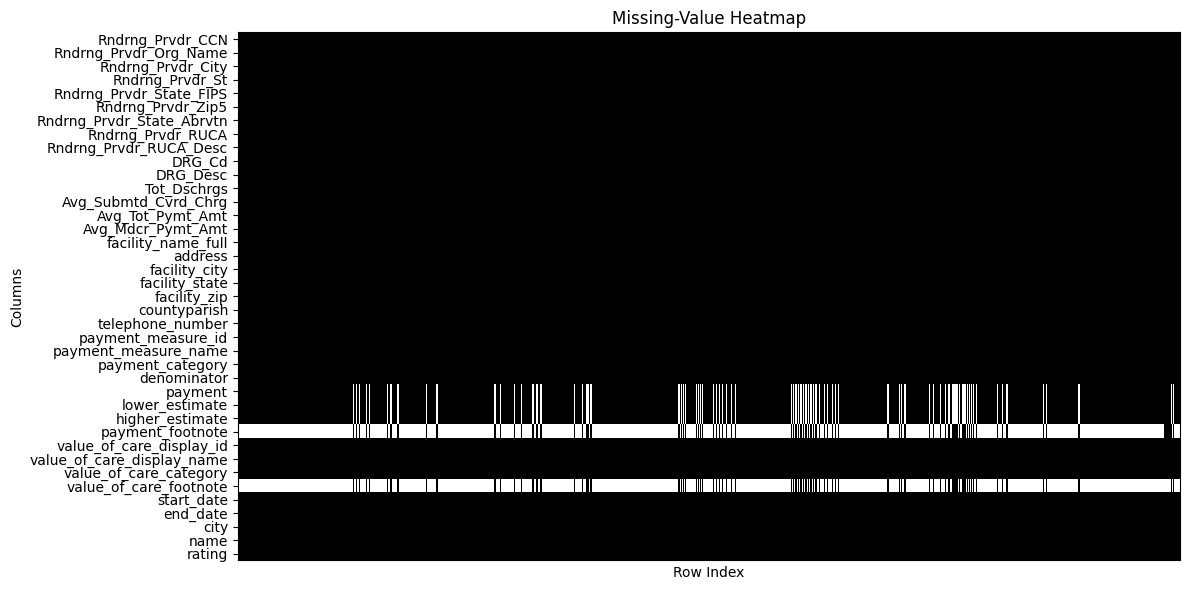

value_of_care_footnote        88.234510
payment_footnote              87.492686
payment                       11.729731
lower_estimate                11.729731
higher_estimate               11.729731
Rndrng_Prvdr_Org_Name          0.000000
Rndrng_Prvdr_CCN               0.000000
Rndrng_Prvdr_State_Abrvtn      0.000000
Rndrng_Prvdr_Zip5              0.000000
Rndrng_Prvdr_State_FIPS        0.000000
Rndrng_Prvdr_St                0.000000
Rndrng_Prvdr_City              0.000000
Rndrng_Prvdr_RUCA              0.000000
DRG_Cd                         0.000000
Rndrng_Prvdr_RUCA_Desc         0.000000
facility_name_full             0.000000
address                        0.000000
facility_city                  0.000000
DRG_Desc                       0.000000
Tot_Dschrgs                    0.000000
Avg_Submtd_Cvrd_Chrg           0.000000
Avg_Tot_Pymt_Amt               0.000000
Avg_Mdcr_Pymt_Amt              0.000000
payment_measure_id             0.000000
telephone_number               0.000000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def missing_value_analysis(df: pd.DataFrame) -> pd.Series:
    """
    Performs missing‐value analysis on the given CSV and
    prints a summary plus a heatmap visualization.
    """

    # 1. Compute % missing per column
    missing_pct = df.isnull().mean() * 100
    missing_pct = missing_pct.sort_values(ascending=False)

    # 2. Print summary
    print("\nMissing Value Percentage by Column:")
    print(missing_pct.to_string())

    # 3. Plot heatmap of missing values
    plt.figure(figsize=(12, 6))
    # transpose so that columns are on the y-axis
    plt.imshow(df.isnull().T, aspect='auto', cmap='gray', interpolation='none')
    plt.yticks(range(len(df.columns)), df.columns)
    plt.xticks([])  # hide row indices
    plt.title("Missing‐Value Heatmap")
    plt.xlabel("Row Index")
    plt.ylabel("Columns")
    plt.tight_layout()
    plt.show()

    return missing_pct

missing_value_analysis(filtered_df)

Rows identical to at least one other row: 0
Duplicate row pairs (excluding first occurrences): 0


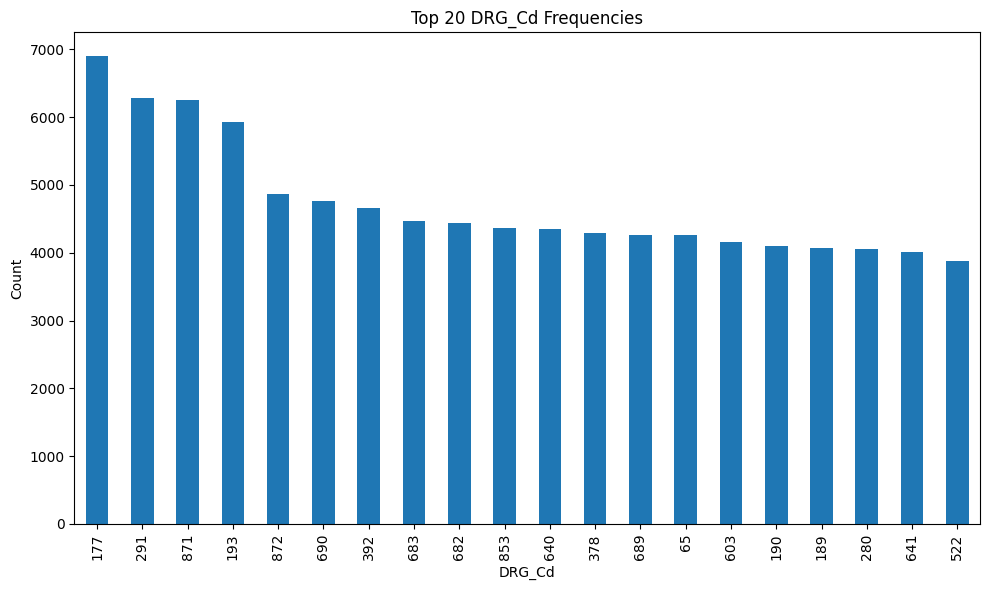

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def identical_rows_analysis(df: pd.DataFrame) -> None:
    """
    1. Reports fully identical rows in the dataset.
    2. Checks for simple inconsistencies (whitespace/case) in key categorical columns.
    3. Plots the top-20 DRG_Cd frequencies as a sanity check.
    """

    # ——— 1. Fully identical row detection ———
    # Mark all rows that have at least one identical counterpart
    dup_mask = df.duplicated(keep=False)
    num_identical = dup_mask.sum()
    num_duplicate_pairs = df.duplicated(keep='first').sum()

    print(f"Rows identical to at least one other row: {num_identical}")
    print(f"Duplicate row pairs (excluding first occurrences): {num_duplicate_pairs}")

    if num_identical:
        print("\nSample identical rows:")
        print(df[dup_mask].head(10).to_string(index=False))

    # ——— 2. Consistency checks ———
    cats = [
        'DRG_Cd', 'DRG_Desc',
        'payment_category', 'value_of_care_category',
        'Rndrng_Prvdr_RUCA_Desc'
    ]
    for col in cats:
        vals = df[col].dropna().unique()
        normalized = [str(v).strip().lower() for v in vals]
        if len(set(vals)) != len(set(normalized)):
            print(f"\nInconsistencies in '{col}':")
            for v in vals[:10]:
                nv = v.strip().lower()
                if v != nv:
                    print(f"  '{v}' → '{nv}'")

    # ——— 3. Quick bar‐chart: top DRG_Cd ———
    top_drgs = df['DRG_Cd'].value_counts().head(20)
    plt.figure(figsize=(10, 6))
    top_drgs.plot(kind='bar')
    plt.title('Top 20 DRG_Cd Frequencies')
    plt.xlabel('DRG_Cd')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

identical_rows_analysis(filtered_df)

In [20]:
import pandas as pd

def data_type_checks(df: pd.DataFrame) -> pd.DataFrame:
    """
    1. Prints dtypes before conversion.
    2. Converts key numeric columns to numeric (coercing errors to NaN).
    3. Parses 'start_date' and 'end_date' as datetime.
    4. Prints dtypes after conversion and reports how many values were coerced.
    """
    print("=== Data Types Before Conversion ===")
    print(df.dtypes, end="\n\n")

    # Define columns to convert
    num_cols = [
        'Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt',
        'Avg_Mdcr_Pymt_Amt', 'payment', 'denominator',
        'lower_estimate', 'higher_estimate',
        'value_of_care_display_id', 'rating'
    ]
    date_cols = ['start_date', 'end_date']

    # Convert numeric columns
    for col in num_cols:
        if col in df.columns:
            before_na = df[col].isna().sum()
            df[col] = pd.to_numeric(df[col], errors='coerce')
            after_na = df[col].isna().sum()
            coerced = after_na - before_na
            print(f"Column '{col}': coerced {coerced} values to NaN")

    # Parse datetime columns
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            n_failed = df[col].isna().sum()
            print(f"Column '{col}': {n_failed} rows could not be parsed as dates")

    print("\n=== Data Types After Conversion ===")
    print(df.dtypes)

    return df

df = data_type_checks(filtered_df)

=== Data Types Before Conversion ===
Rndrng_Prvdr_CCN                       int64
Rndrng_Prvdr_Org_Name                 object
Rndrng_Prvdr_City                     object
Rndrng_Prvdr_St                       object
Rndrng_Prvdr_State_FIPS                int64
Rndrng_Prvdr_Zip5                      int64
Rndrng_Prvdr_State_Abrvtn             object
Rndrng_Prvdr_RUCA                    float64
Rndrng_Prvdr_RUCA_Desc                object
DRG_Cd                                 int64
DRG_Desc                              object
Tot_Dschrgs                            int64
Avg_Submtd_Cvrd_Chrg                 float64
Avg_Tot_Pymt_Amt                     float64
Avg_Mdcr_Pymt_Amt                    float64
facility_name_full                    object
address                               object
facility_city                         object
facility_state                        object
facility_zip                         float64
countyparish                          object
telephone_number  

C:\Users\yash\AppData\Local\Temp\ipykernel_5344\2308266992.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


Column 'start_date': 0 rows could not be parsed as dates
Column 'end_date': 0 rows could not be parsed as dates

=== Data Types After Conversion ===
Rndrng_Prvdr_CCN                       int64
Rndrng_Prvdr_Org_Name                 object
Rndrng_Prvdr_City                     object
Rndrng_Prvdr_St                       object
Rndrng_Prvdr_State_FIPS                int64
Rndrng_Prvdr_Zip5                      int64
Rndrng_Prvdr_State_Abrvtn             object
Rndrng_Prvdr_RUCA                    float64
Rndrng_Prvdr_RUCA_Desc                object
DRG_Cd                                 int64
DRG_Desc                              object
Tot_Dschrgs                            int64
Avg_Submtd_Cvrd_Chrg                 float64
Avg_Tot_Pymt_Amt                     float64
Avg_Mdcr_Pymt_Amt                    float64
facility_name_full                    object
address                               object
facility_city                         object
facility_state                        obj

C:\Users\yash\AppData\Local\Temp\ipykernel_5344\2308266992.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\yash\AppData\Local\Temp\ipykernel_5344\2308266992.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')


# Univariate analysis


=== Numeric Descriptive Statistics ===
                             count          mean           std           min  \
Rndrng_Prvdr_CCN          307620.0  25684.169092  11515.055086  10001.000000   
Rndrng_Prvdr_State_FIPS   307620.0      3.226175      1.602963      1.000000   
Rndrng_Prvdr_Zip5         307620.0  66691.442494  22038.867792  35007.000000   
Rndrng_Prvdr_RUCA         307620.0      1.540772      4.383894      1.000000   
DRG_Cd                    307620.0    416.447955    247.608767      1.000000   
Tot_Dschrgs               307620.0     32.076692     45.039752     11.000000   
Avg_Submtd_Cvrd_Chrg      307620.0  87170.024164  91143.939987   3545.357143   
Avg_Tot_Pymt_Amt          307620.0  15207.894762  16720.812054   3484.250000   
Avg_Mdcr_Pymt_Amt         307620.0  12781.115577  15415.086684   1995.333333   
facility_zip              307620.0  66691.612938  22038.779695  35007.000000   
denominator               271537.0    296.168463    242.783574     25.000000   


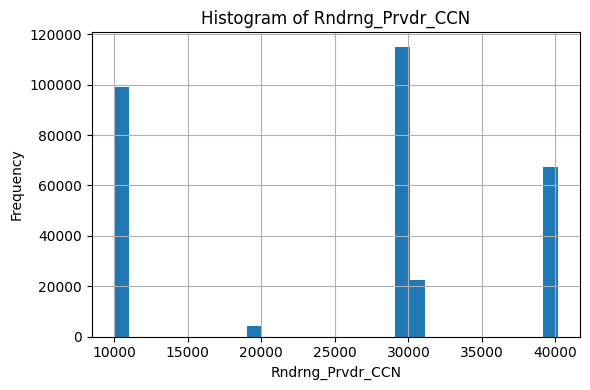

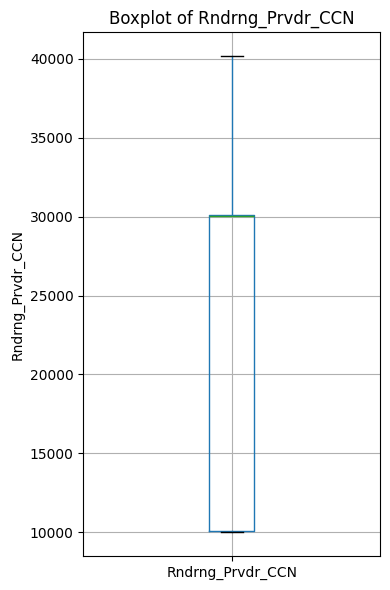

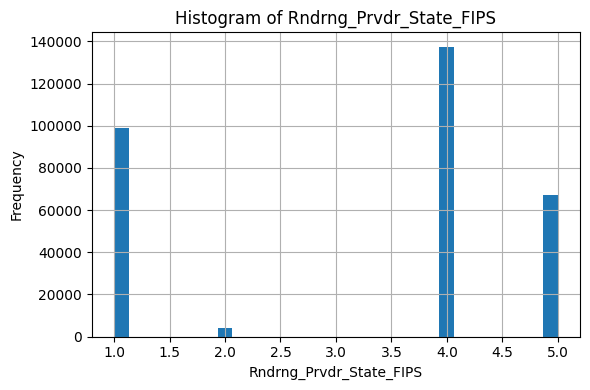

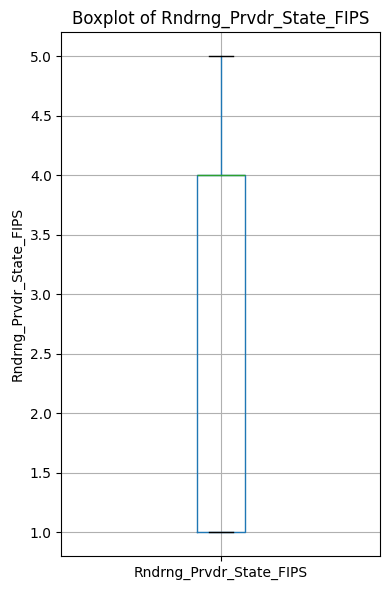

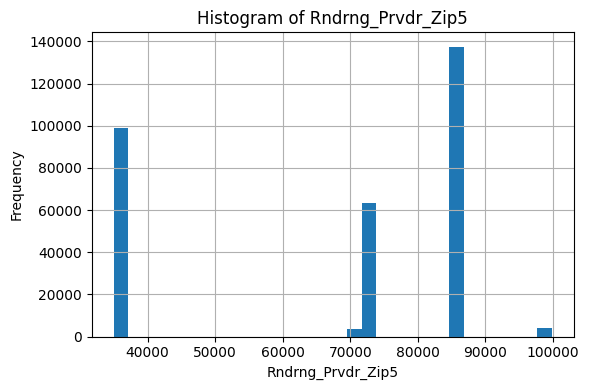

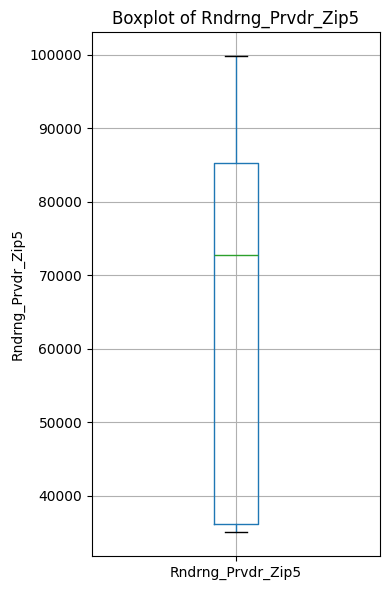

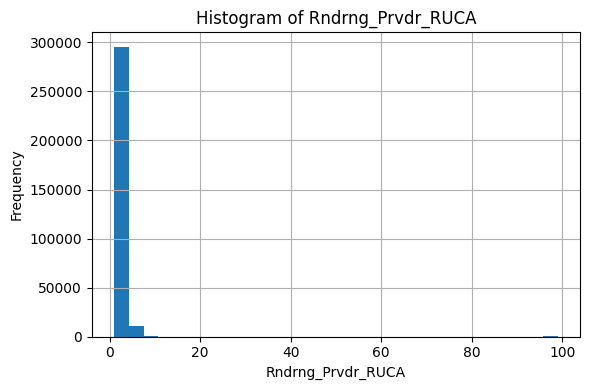

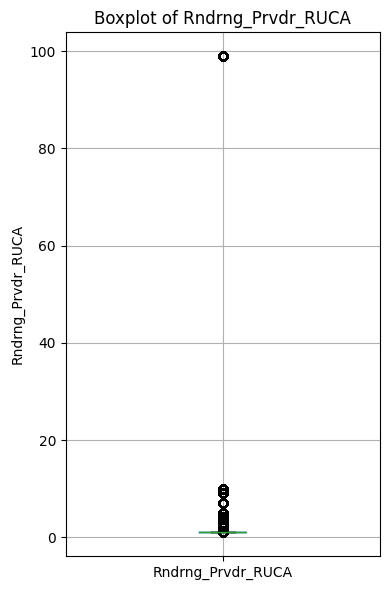

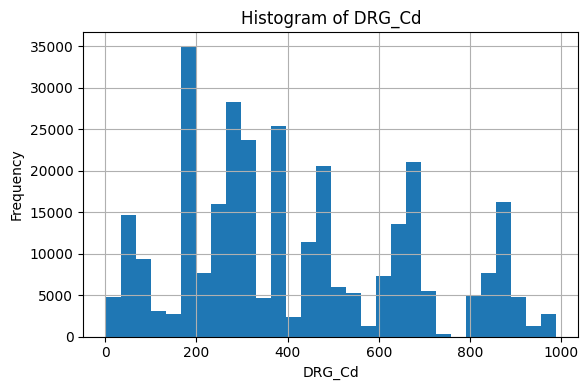

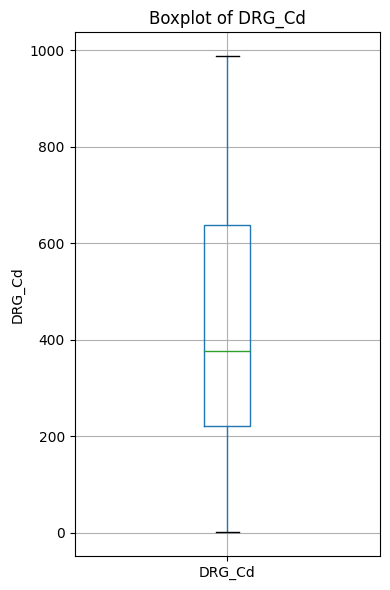

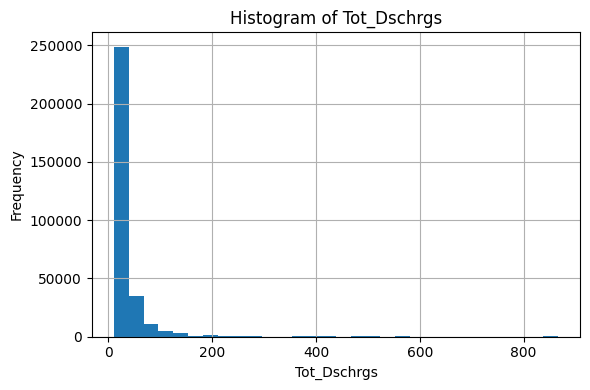

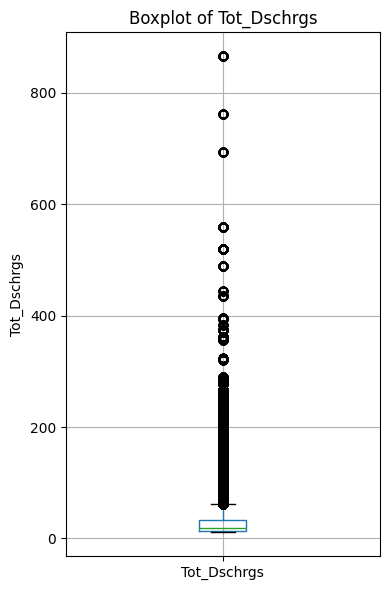

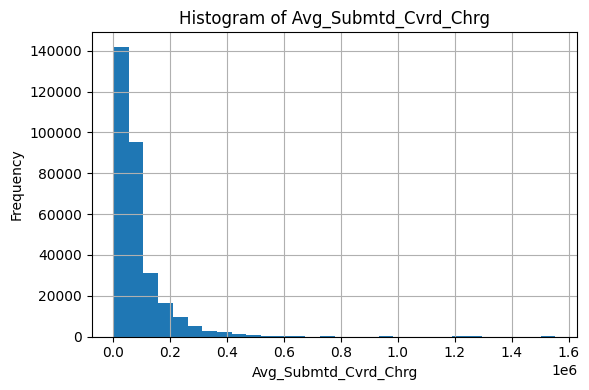

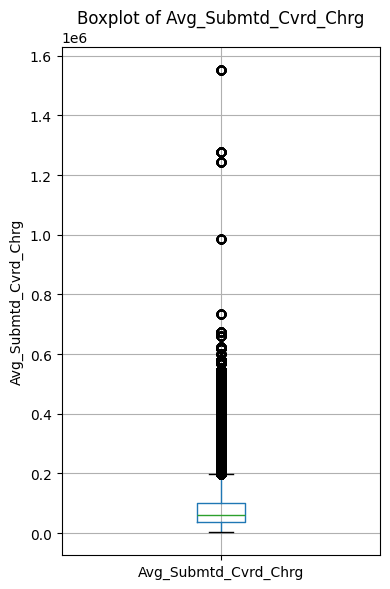

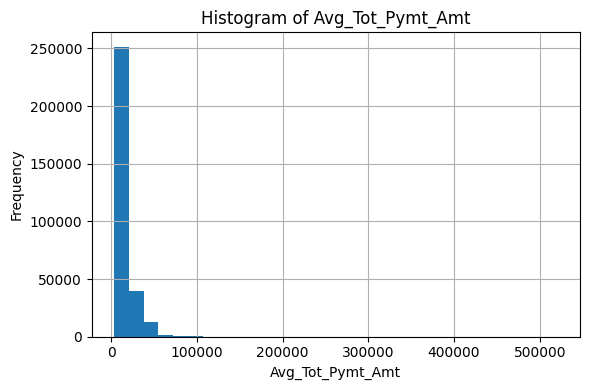

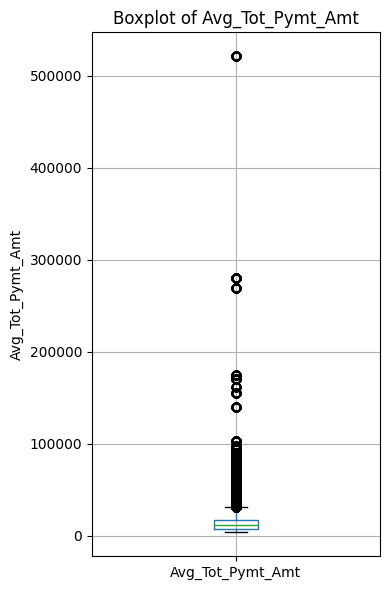

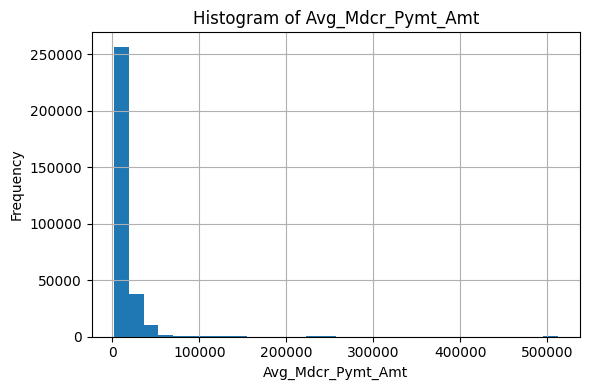

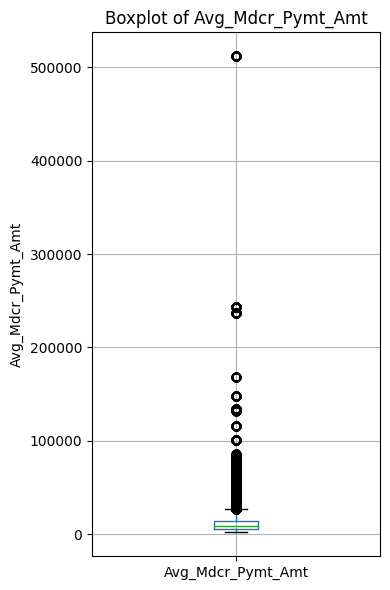

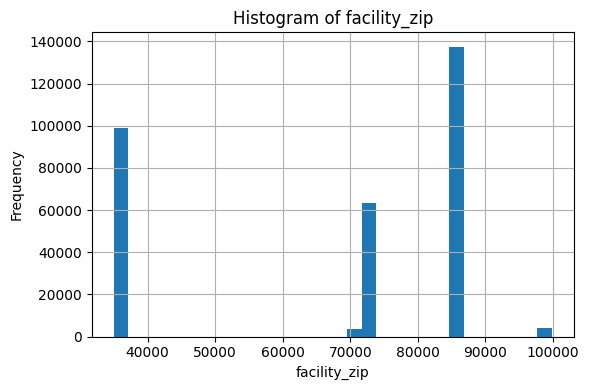

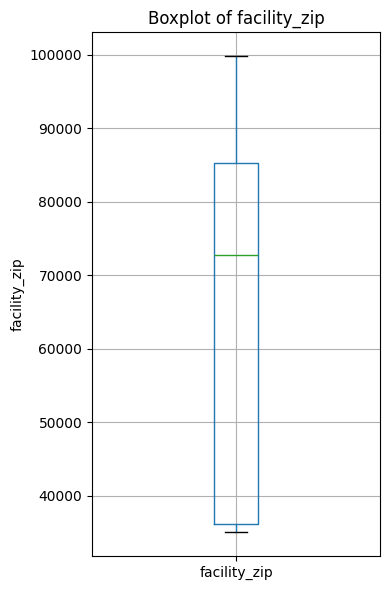

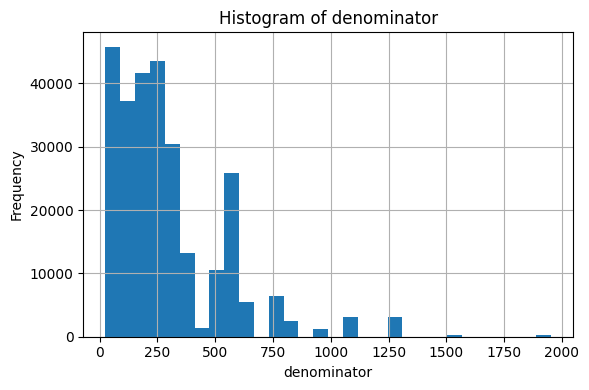

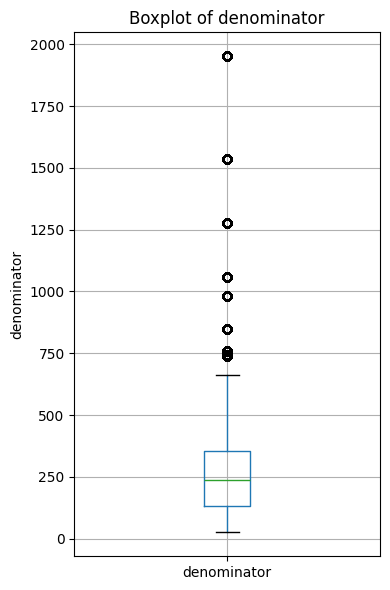

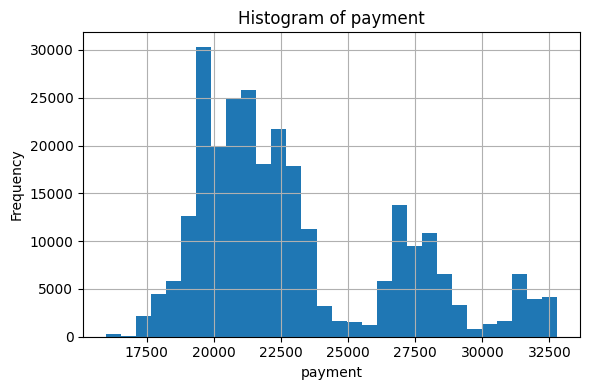

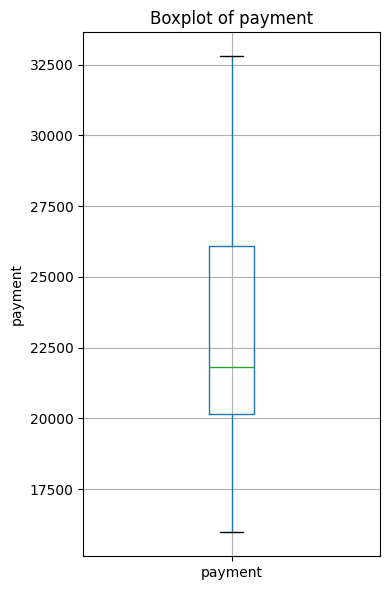

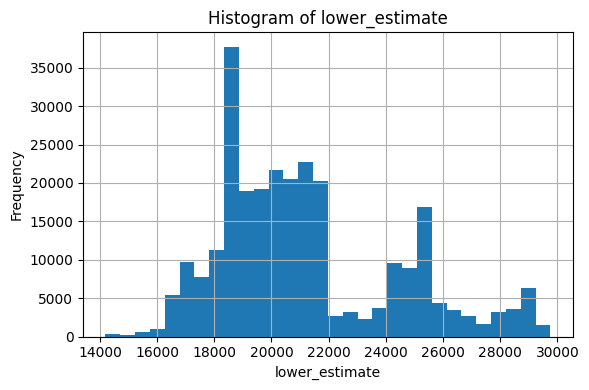

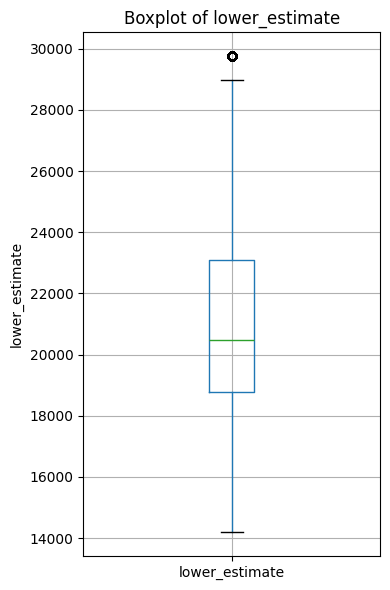

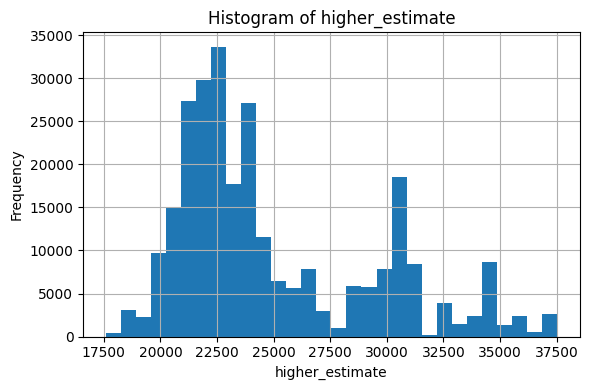

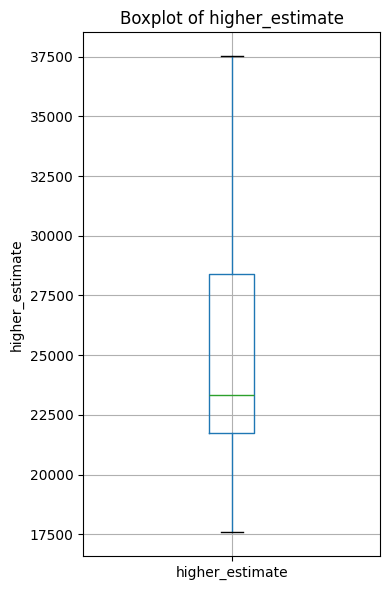

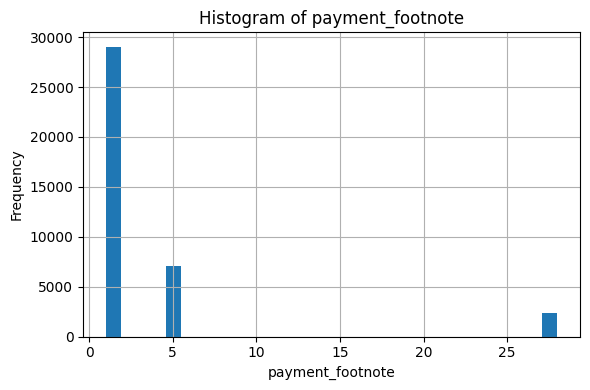

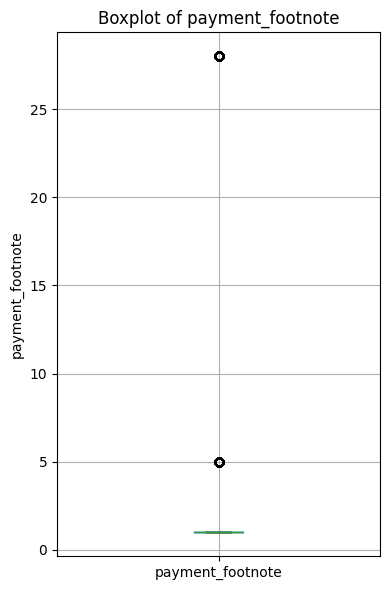

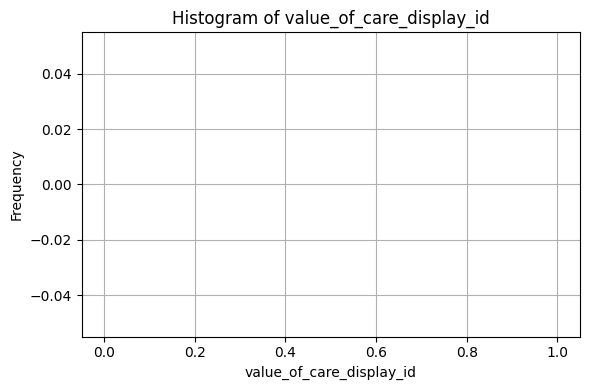

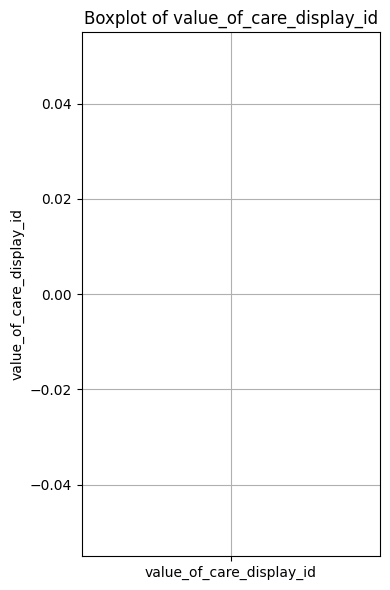

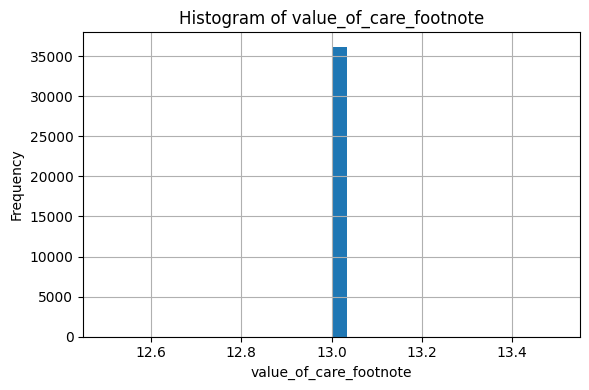

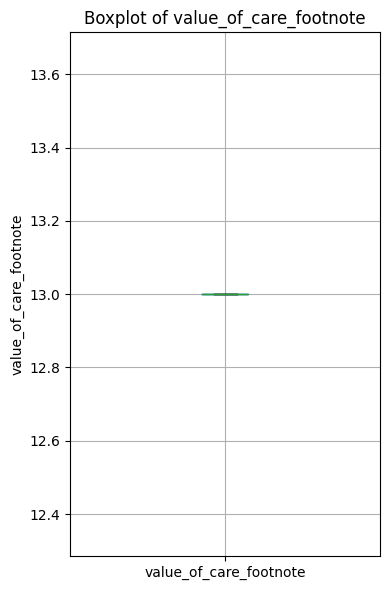

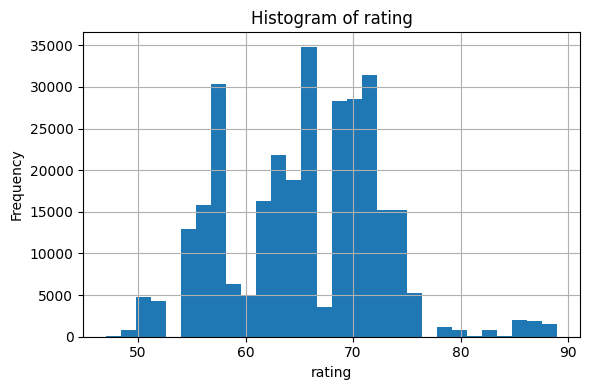

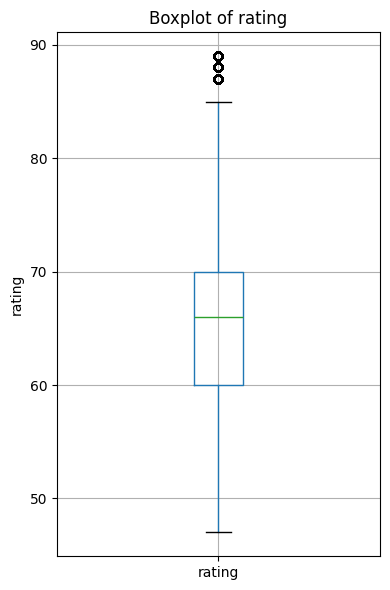


=== Top 20 categories for Rndrng_Prvdr_Org_Name ===
Rndrng_Prvdr_Org_Name
Honorhealth Scottsdale Shea Medical Center         18048
Baptist Health Medical Center-Little Rock          15916
Honorhealth Scottsdale Osborn Medical Center       14720
Grandview Medical Center                           13068
Huntsville Hospital                                12300
Banner Desert Medical Center                       11352
Uams Medical Center                                10672
Banner Boswell Medical Center                       9776
Honorhealth Deer Valley Medical Center              9424
Banner Baywood Medical Center                       8568
Banner Thunderbird Medical Center                   8060
Dch Regional Medical Center                         7760
Baptist Health Medical Center North Little Rock     7392
Northwest Medical Center                            7208
Tucson Medical Center                               6424
Washington Regional Medical Center                  6060
Cullman Regio

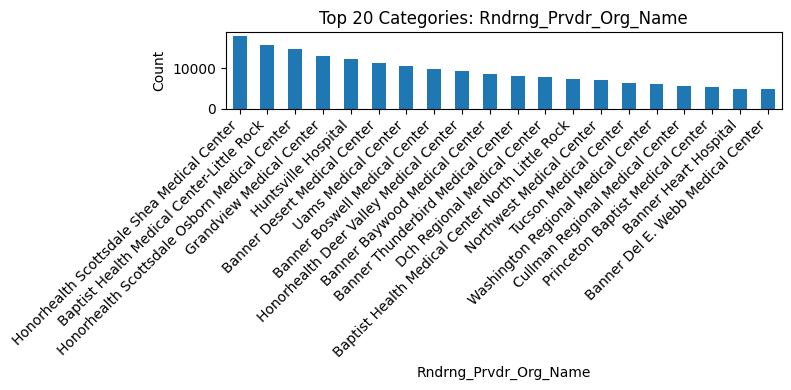


=== Top 20 categories for Rndrng_Prvdr_City ===
Rndrng_Prvdr_City
Scottsdale           32768
Mesa                 27080
Little Rock          26588
Birmingham           21948
Phoenix              19184
Huntsville           15780
Tucson               12328
Sun City              9776
Glendale              8060
Tuscaloosa            7760
North Little Rock     7392
Fayetteville          6544
Montgomery            6360
Gadsden               6184
Cullman               5616
Sun City West         4816
Goodyear              4752
Dothan                4092
Rogers                3936
Anniston              3780


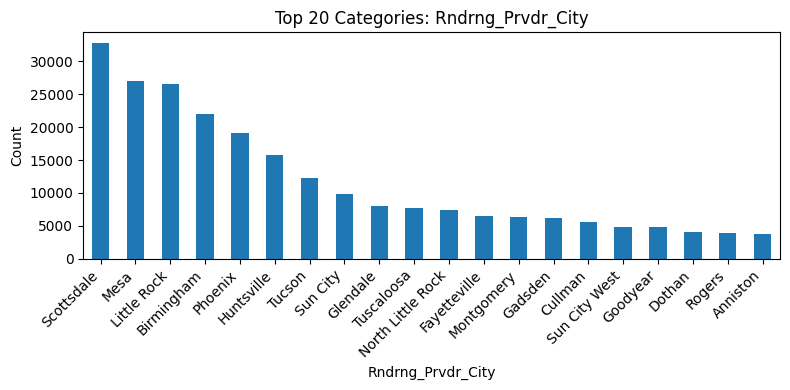


=== Top 20 categories for Rndrng_Prvdr_St ===
Rndrng_Prvdr_St
9003 East Shea Boulevard                  18048
9601 Interstate                           15916
7400 East Osborn Road                     14720
3690 Grandview Parkway                    13068
101 Sivley Rd                             12300
1400 South  Dobson Road                   11352
4301 West Markham Street Mail Slot 612    10672
10401 West Thunderbird Boulevard           9776
19829 North 27th Avenue                    9424
6644 East Baywood Avenue                   8568
5555 West Thunderbird Road                 8060
809 University Boulevard East              7760
3333 Springhill Drive                      7392
5301 East Grant Road                       6424
3215 N North Hills Boulevard               6060
1912 Alabama Highway 157                   5616
701 Princeton Avenue Southwest             5400
6750 East Baywood Avenue                   4884
14502 West Meeker Boulevard                4816
13677 West Mcdowell Road 

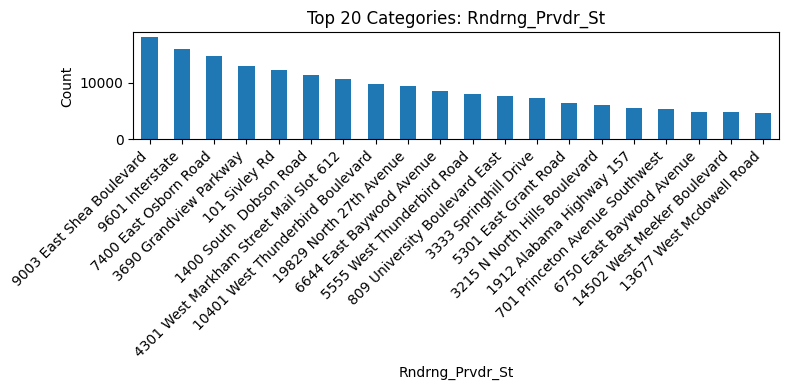


=== Top 20 categories for Rndrng_Prvdr_State_Abrvtn ===
Rndrng_Prvdr_State_Abrvtn
AZ    137408
AL     99040
AR     67140
AK      4032


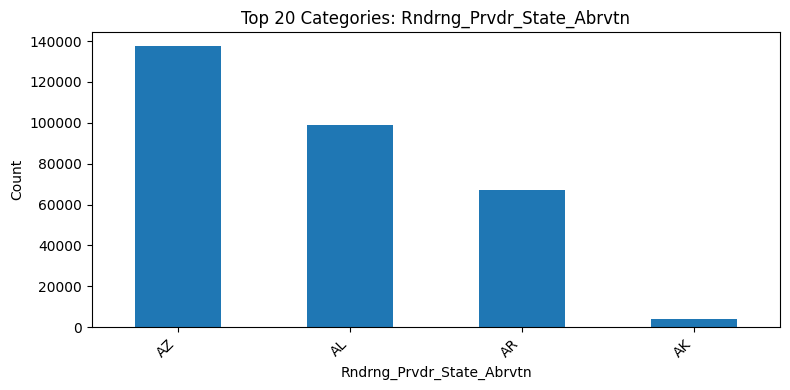


=== Top 20 categories for Rndrng_Prvdr_RUCA_Desc ===
Rndrng_Prvdr_RUCA_Desc
Metropolitan area core: primary flow within an urbanized area of 50,000 and greater                     265968
Metropolitan area high commuting: primary flow 30% or more to a urbanized area of 50,000 and greater     14028
Micropolitan area core: primary flow within an urban cluster of 10,000 to 49,999                         11368
Micropolitan high commuting: primary flow 30% or more to a urban cluster of 10,000 to 49,999              6792
Small town core: primary flow within an urban cluster of 2,500 to 9,999                                   3820
Secondary flow 30% to <50% to a larger urbanized area of 50,000 and greater                               2800
Secondary flow 30% to <50% to a urbanized area of 50,000 and greater                                      1204
Unknown                                                                                                    580
Small town low commuting: primary f

C:\Users\yash\AppData\Local\Temp\ipykernel_5344\2695585793.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


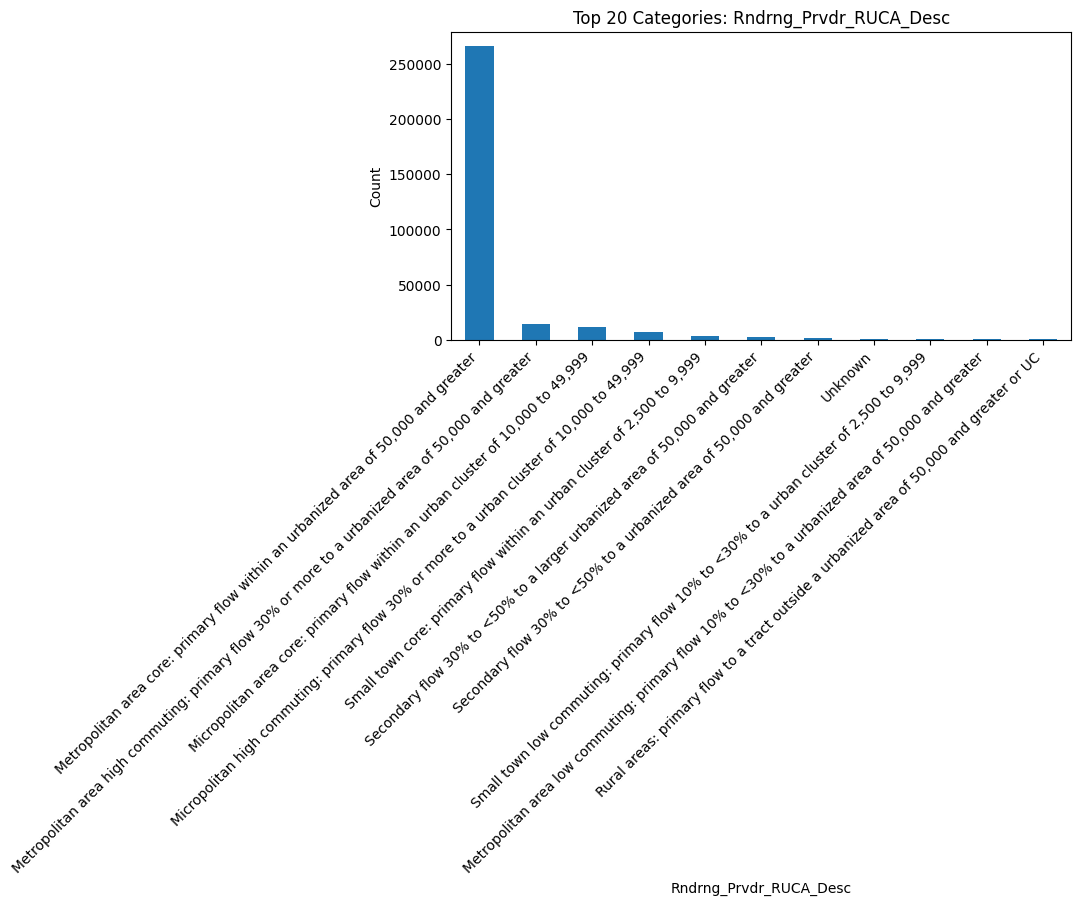


=== Top 20 categories for DRG_Desc ===
DRG_Desc
RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC                                        6904
HEART FAILURE AND SHOCK WITH MCC                                                         6288
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                                6252
SIMPLE PNEUMONIA AND PLEURISY WITH MCC                                                   5920
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC                             4860
KIDNEY AND URINARY TRACT INFECTIONS WITHOUT MCC                                          4768
ESOPHAGITIS, GASTROENTERITIS AND MISCELLANEOUS DIGESTIVE DISORDERS WITHOUT MCC           4660
RENAL FAILURE WITH CC                                                                    4460
RENAL FAILURE WITH MCC                                                                   4440
INFECTIOUS AND PARASITIC DISEASES WITH O.R. PROCEDURES WITH MCC                          4364
MISCELLANEO

C:\Users\yash\AppData\Local\Temp\ipykernel_5344\2695585793.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


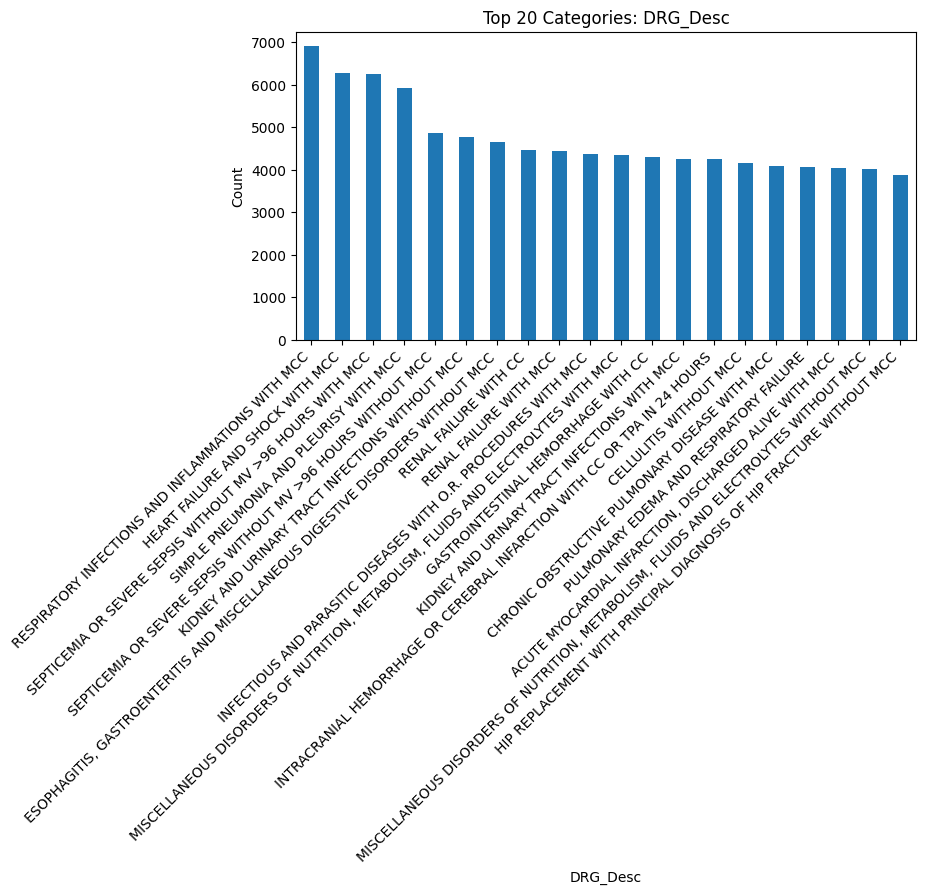


=== Top 20 categories for facility_name_full ===
facility_name_full
honorhealth scottsdale shea medical center         18048
baptist health medical centerlittle rock           15916
honorhealth scottsdale osborn medical center       14720
grandview medical center                           13068
huntsville hospital                                12300
banner desert medical center                       11352
uams medical center                                10672
banner boswell medical center                       9776
honorhealth deer valley medical center              9424
banner baywood medical center                       8568
banner thunderbird medical center                   8060
dch regional medical center                         7760
baptist health medical center north little rock     7392
tucson medical center                               6424
washington regional medical center                  6060
cullman regional medical center                     5616
princeton baptist m

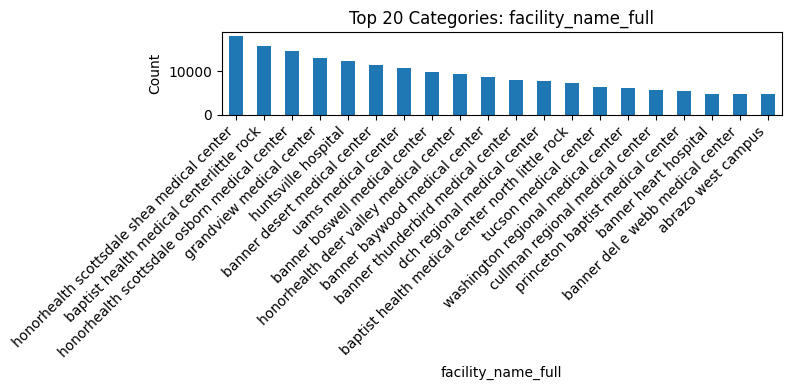


=== Top 20 categories for address ===
address
9003 EAST SHEA BOULEVARD                  18048
9601 BAPTIST HEALTH DRIVE                 15916
7400 EAST OSBORN ROAD                     14720
3690 GRANDVIEW PARKWAY                    13068
101 SIVLEY RD                             12300
1400 SOUTH  DOBSON ROAD                   11352
4301 WEST MARKHAM STREET MAIL SLOT 612    10672
10401 WEST THUNDERBIRD BOULEVARD           9776
19829 NORTH 27TH AVENUE                    9424
6644 EAST BAYWOOD AVENUE                   8568
5555 WEST THUNDERBIRD ROAD                 8060
809 UNIVERSITY BOULEVARD EAST              7760
3333 SPRINGHILL DRIVE                      7392
5301 EAST GRANT ROAD                       6424
3215 N NORTH HILLS BOULEVARD               6060
1912 ALABAMA HIGHWAY 157                   5616
701 PRINCETON AVENUE SOUTHWEST             5400
6750 EAST BAYWOOD AVENUE                   4884
14502 WEST MEEKER BOULEVARD                4816
13677 WEST MCDOWELL ROAD                 

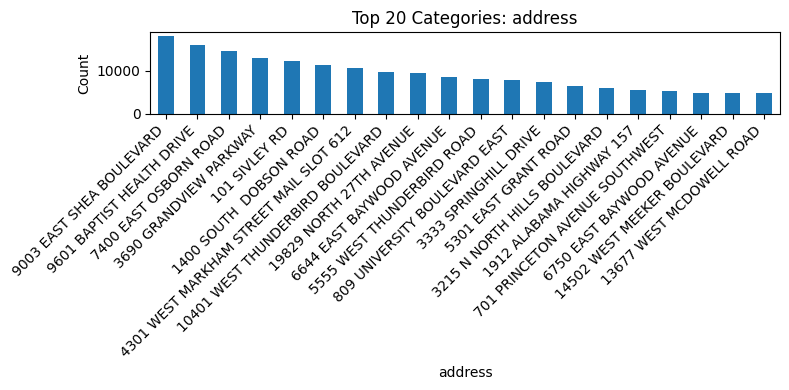


=== Top 20 categories for facility_city ===
facility_city
SCOTTSDALE           32768
MESA                 27080
LITTLE ROCK          26588
PHOENIX              19184
BIRMINGHAM           18468
HUNTSVILLE           15780
TUCSON               12328
SUN CITY              9776
GLENDALE              8060
TUSCALOOSA            7760
NORTH LITTLE ROCK     7392
MONTGOMERY            6360
GADSDEN               6184
FAYETTEVILLE          6060
CULLMAN               5616
SUN CITY WEST         4816
GOODYEAR              4752
DOTHAN                4092
ROGERS                3936
ANNISTON              3780


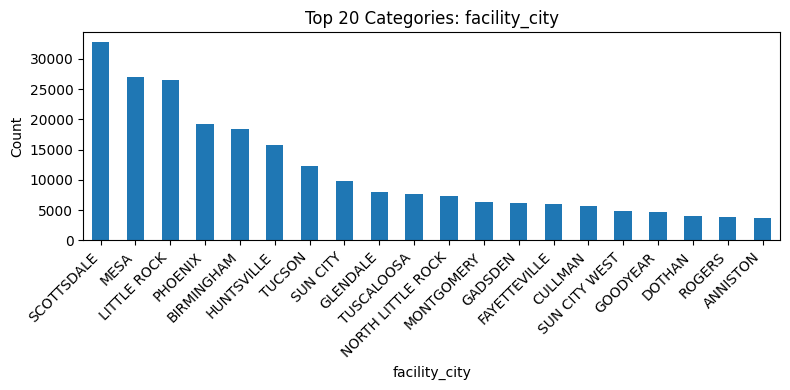


=== Top 20 categories for facility_state ===
facility_state
AZ    137408
AL     99040
AR     67140
AK      4032


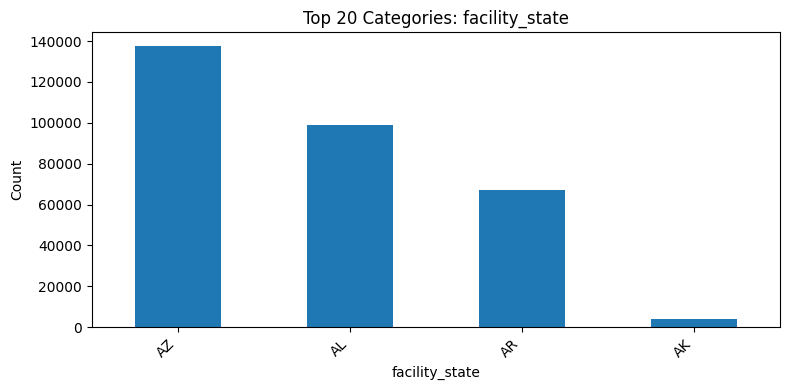


=== Top 20 categories for countyparish ===
countyparish
MARICOPA      111684
PULASKI        34992
JEFFERSON      25076
MADISON        15780
PIMA           15256
WASHINGTON      8660
TUSCALOOSA      7760
MONTGOMERY      6360
ETOWAH          6184
CULLMAN         5616
BALDWIN         4808
BENTON          4420
SALINE          4292
HOUSTON         4092
CALHOUN         3780
SEBASTIAN       3680
SHELBY          3564
MOBILE          3440
WALKER          2900
ANCHORAGE       2800


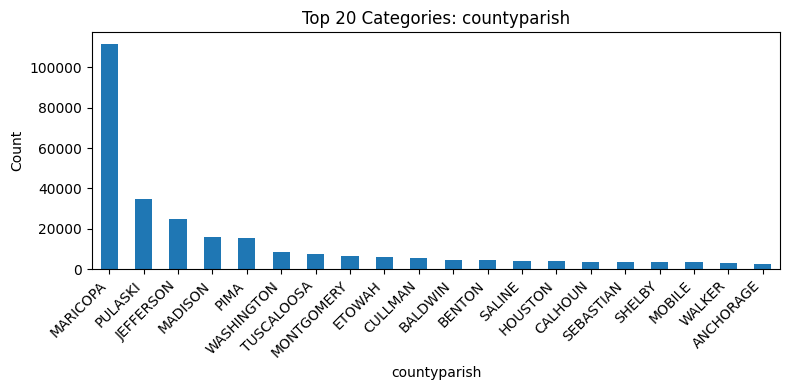


=== Top 20 categories for telephone_number ===
telephone_number
(480) 323-3000    18048
(501) 202-2000    15916
(480) 882-4004    14720
(205) 971-1000    13068
(256) 265-1000    12300
(480) 412-3000    11352
(501) 686-5000    10672
(623) 832-4000     9776
(623) 879-6100     9424
(480) 321-2000     8568
(602) 865-4470     8060
(205) 759-7111     7760
(501) 202-3000     7392
(520) 324-1399     6424
(479) 463-5113     6060
(256) 737-2000     5616
(205) 783-3800     5400
(480) 854-5050     4884
(623) 524-4000     4816
(623) 882-1970     4752


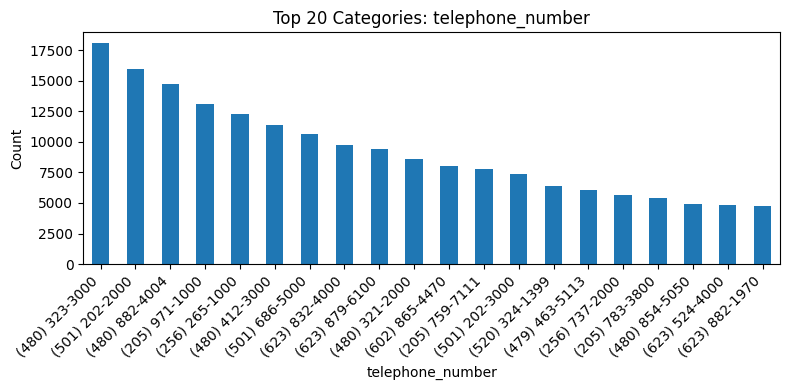


=== Top 20 categories for payment_measure_id ===
payment_measure_id
PAYM_30_AMI         76905
PAYM_30_HF          76905
PAYM_30_PN          76905
PAYM_90_HIP_KNEE    76905


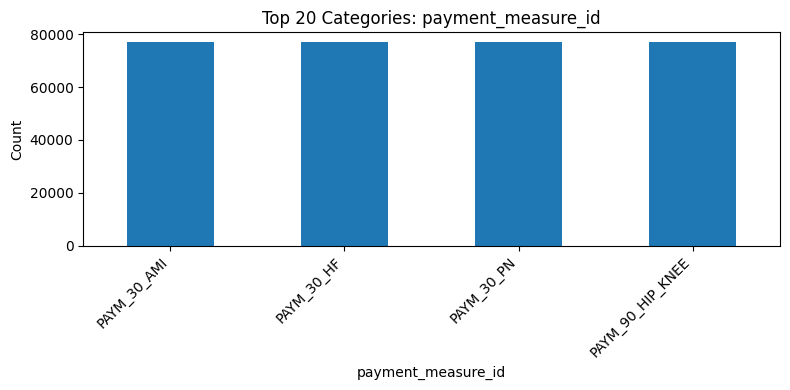


=== Top 20 categories for payment_measure_name ===
payment_measure_name
Payment for heart attack patients            76905
Payment for heart failure patients           76905
Payment for pneumonia patients               76905
Payment for hip/knee replacement patients    76905


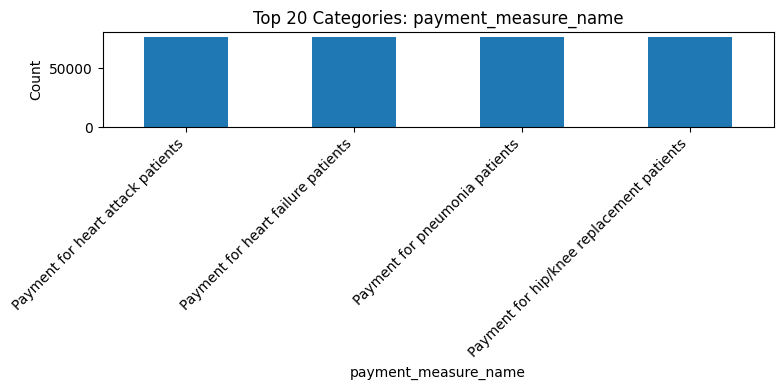


=== Top 20 categories for payment_category ===
payment_category
No Different Than the National Average Payment    181534
Greater Than the National Average Payment          60918
Less Than the National Average Payment             29085
Number of Cases Too Small                          29026
Not Available                                       7057


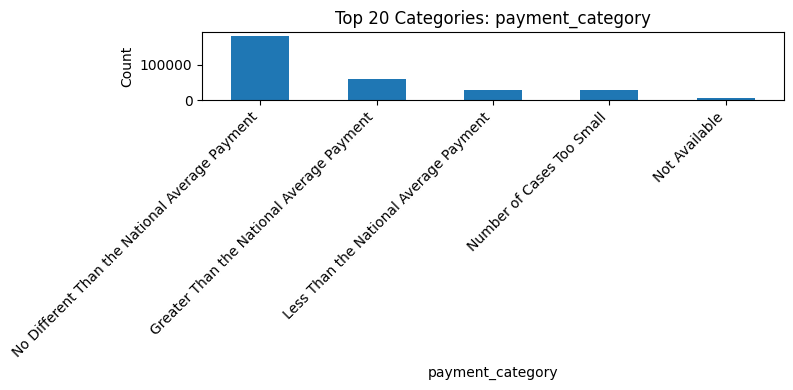


=== Top 20 categories for value_of_care_display_name ===
value_of_care_display_name
Value of Care Heart Attack measure    76905
Value of Care Heart Failure measur    76905
Value of Care Pneumonia measure       76905
Value of Care hip/knee replacement    76905


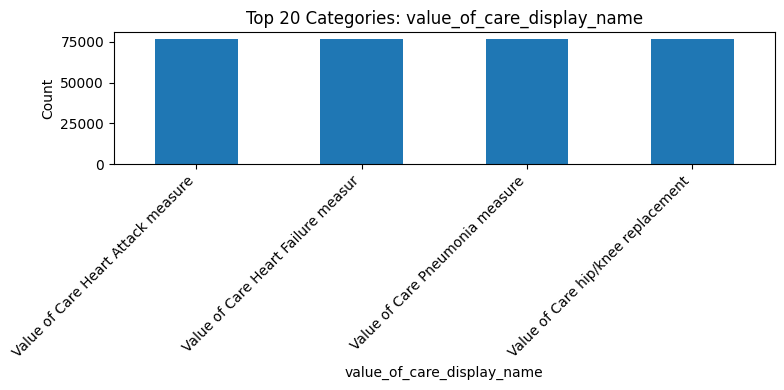


=== Top 20 categories for value_of_care_category ===
value_of_care_category
Average Mortality and Average Payment        133790
Average Mortality and Higher Payment          49464
Not Available                                 36193
Average Complications and Average Payment     30399
Average Complications and Lower Payment       18254
Worse Mortality and Average Payment           17235
Average Mortality and Lower Payment            8871
Worse Mortality and Higher Payment             7717
Average Complications and Higher Payment       3737
Worse Mortality and Lower Payment              1596
Better Complications and Lower Payment          224
Better Mortality and Lower Payment              140


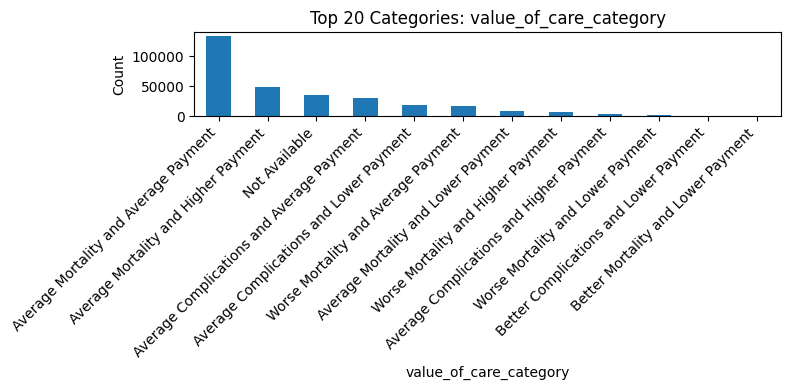


=== Top 20 categories for city ===
city
Cave Creek         3916
Anthem             3864
Goodyear           3716
Peoria             3716
Avondale           3716
Litchfield Park    3716
Surprise           3708
Sun City West      3708
El Mirage          3708
Glendale           3664
Tolleson           3664
Maricopa           3592
Sacaton            3592
Fountain Hills     3572
Ajo                3572
Paradise Valley    3520
Apache Junction    3508
Queen Creek        3508
Tempe              3500
Laveen             3404


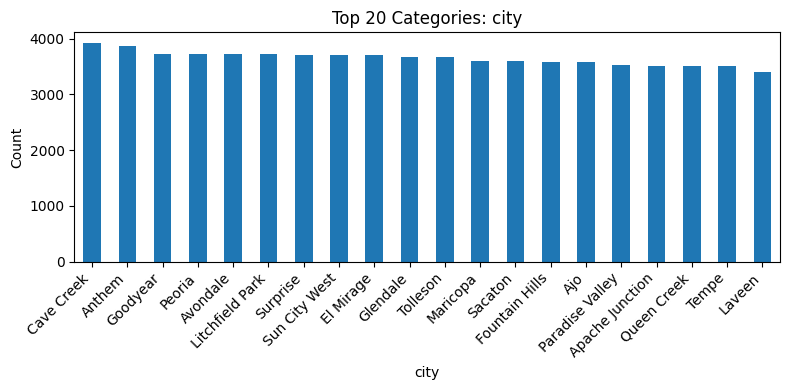


=== Top 20 categories for name ===
name
honorhealth scottsdale shea medical center         18048
baptist health medical centerlittle rock           15916
honorhealth scottsdale osborn medical center       14720
grandview medical center                           13068
huntsville hospital                                12300
banner desert medical center                       11352
uams medical center                                10672
banner boswell medical center                       9776
honorhealth deer valley medical center              9424
banner baywood medical center                       8568
banner thunderbird medical center                   8060
dch regional medical center                         7760
baptist health medical center north little rock     7392
tucson medical center                               6424
washington regional medical center                  6060
cullman regional medical center                     5616
princeton baptist medical center               

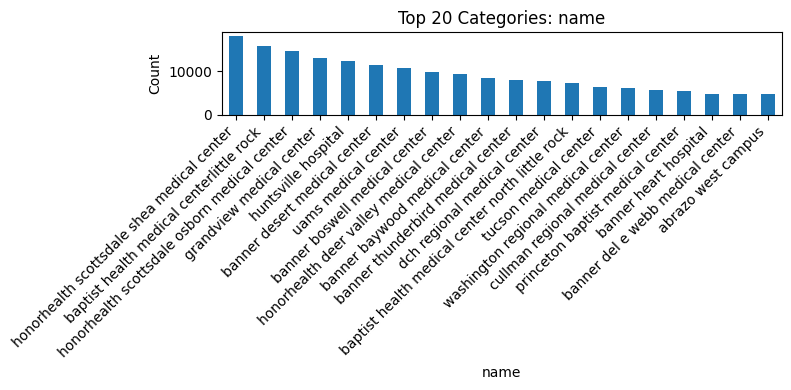

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def univariate_analysis(
    df: pd.DataFrame,
    numeric_cols: list[str] | None = None,
    categorical_cols: list[str] | None = None
):
    """
    1. Prints descriptive statistics for numeric columns.
    2. Plots histograms and boxplots for each numeric column.
    3. Prints top-20 value counts for categorical columns and plots bar charts.
    
    Parameters:
        df: your pandas DataFrame
        numeric_cols: list of column names to treat as numeric;
                      by default, inferred via df.select_dtypes(include='number')
        categorical_cols: list of column names to treat as categorical;
                          by default, inferred via df.select_dtypes(include=['object','category'])
    """
    # 1. Infer columns if not provided
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include='number').columns.tolist()
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # 2. Numeric summaries
    print("\n=== Numeric Descriptive Statistics ===")
    desc = df[numeric_cols].describe().transpose()
    print(desc)
    
    # 3. Histograms and boxplots for numeric columns
    for col in numeric_cols:
        # Histogram
        plt.figure(figsize=(6, 4))
        df[col].hist(bins=30)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
        
        # Boxplot
        plt.figure(figsize=(4, 6))
        df.boxplot(column=col)
        plt.title(f"Boxplot of {col}")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    
    # 4. Categorical counts and bar charts
    for col in categorical_cols:
        counts = df[col].value_counts().head(20)
        if counts.empty:
            continue
        print(f"\n=== Top 20 categories for {col} ===")
        print(counts.to_string())
        
        plt.figure(figsize=(8, 4))
        counts.plot(kind="bar")
        plt.title(f"Top 20 Categories: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

univariate_analysis(df)

# Bivariate Analysis


=== Correlation Matrix ===
                          Rndrng_Prvdr_CCN  Rndrng_Prvdr_State_FIPS  \
Rndrng_Prvdr_CCN                  1.000000                 0.994845   
Rndrng_Prvdr_State_FIPS           0.994845                 1.000000   
Rndrng_Prvdr_Zip5                 0.817756                 0.857862   
Rndrng_Prvdr_RUCA                -0.098546                -0.103558   
DRG_Cd                            0.013436                 0.012680   
Tot_Dschrgs                       0.020113                 0.019649   
Avg_Submtd_Cvrd_Chrg             -0.086446                -0.075720   
Avg_Tot_Pymt_Amt                  0.065955                 0.064253   
Avg_Mdcr_Pymt_Amt                 0.077236                 0.077758   
facility_zip                      0.817760                 0.857865   
denominator                       0.010374                 0.017428   
payment                           0.052113                 0.044787   
lower_estimate                    0.068317       

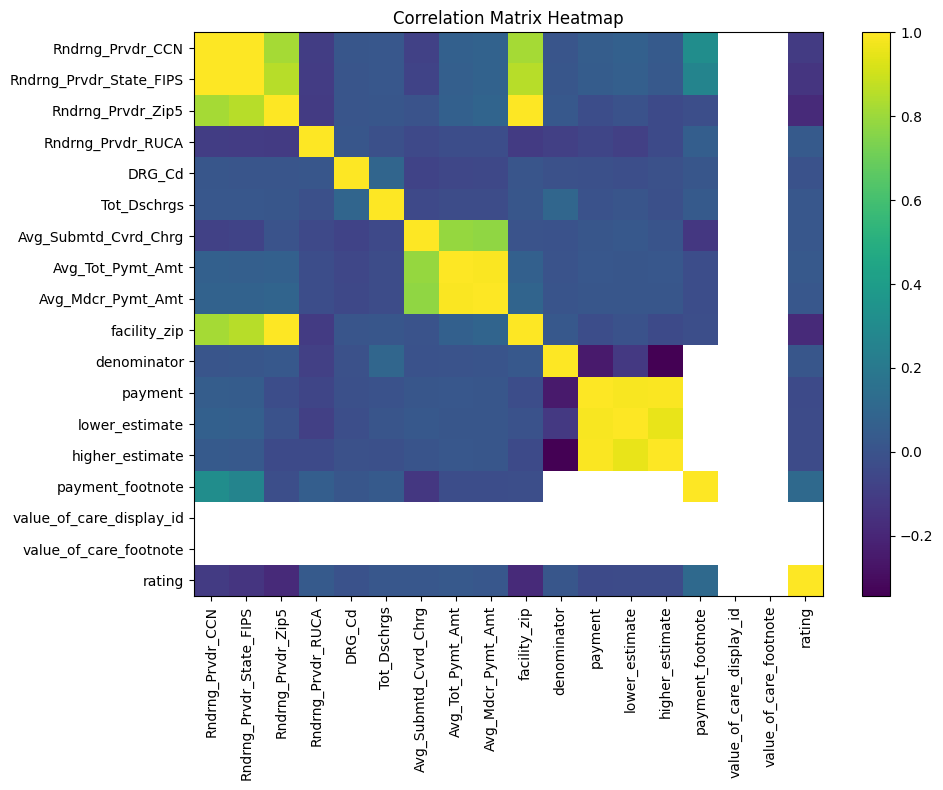

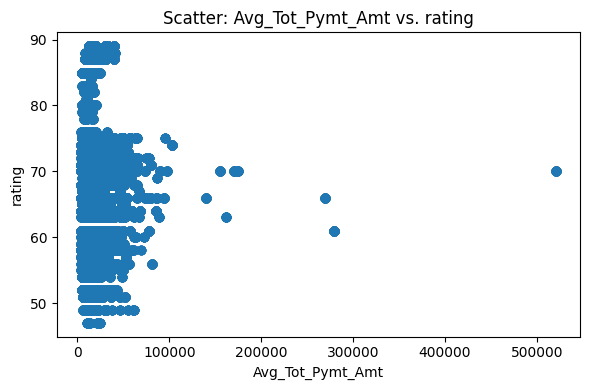

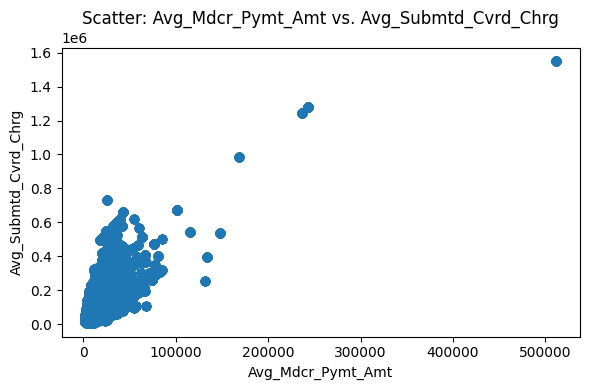

<Figure size 800x600 with 0 Axes>

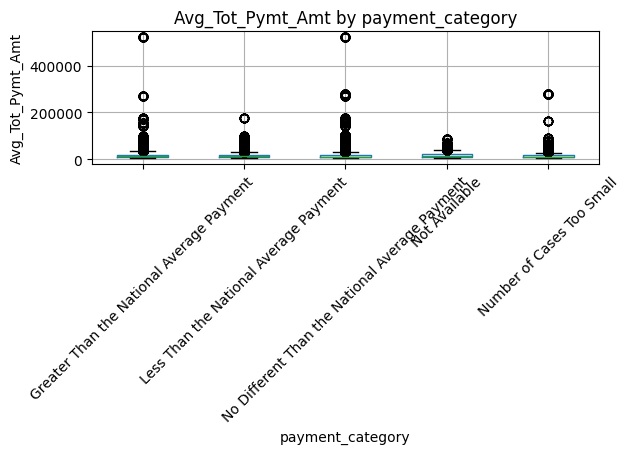

<Figure size 800x600 with 0 Axes>

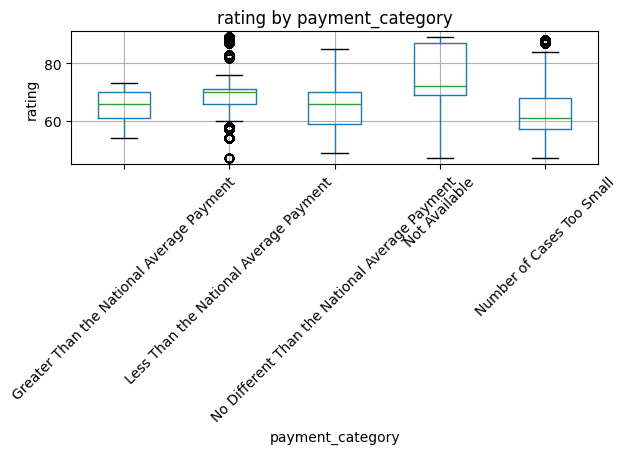

<Figure size 800x600 with 0 Axes>

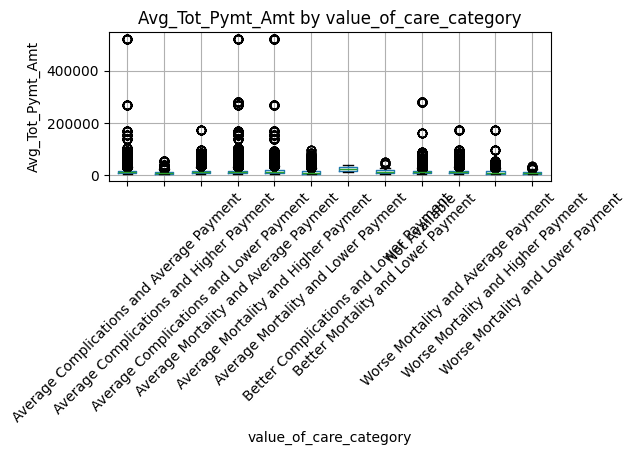

<Figure size 800x600 with 0 Axes>

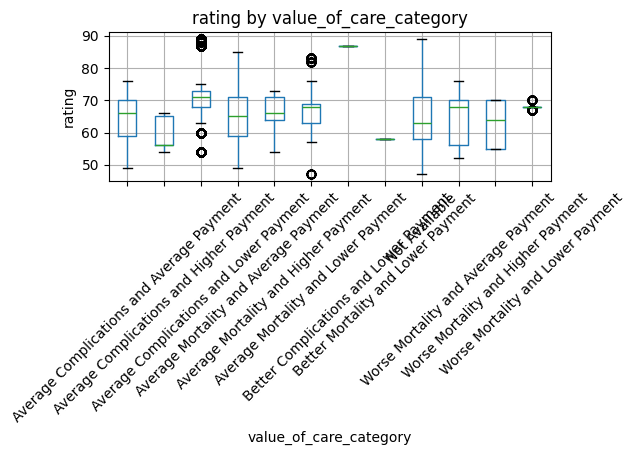

                          Rndrng_Prvdr_CCN  Rndrng_Prvdr_State_FIPS  \
Rndrng_Prvdr_CCN                  1.000000                 0.994845   
Rndrng_Prvdr_State_FIPS           0.994845                 1.000000   
Rndrng_Prvdr_Zip5                 0.817756                 0.857862   
Rndrng_Prvdr_RUCA                -0.098546                -0.103558   
DRG_Cd                            0.013436                 0.012680   
Tot_Dschrgs                       0.020113                 0.019649   
Avg_Submtd_Cvrd_Chrg             -0.086446                -0.075720   
Avg_Tot_Pymt_Amt                  0.065955                 0.064253   
Avg_Mdcr_Pymt_Amt                 0.077236                 0.077758   
facility_zip                      0.817760                 0.857865   
denominator                       0.010374                 0.017428   
payment                           0.052113                 0.044787   
lower_estimate                    0.068317                 0.063188   
higher

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def bivariate_analysis(
    df: pd.DataFrame,
    numeric_cols: list[str] | None = None,
    scatter_pairs: list[tuple[str, str]] | None = None,
    cat_group_cols: list[str] | None = None
) -> pd.DataFrame:
    """
    1. Prints and plots the correlation matrix for numeric columns.
    2. Generates scatter plots for specified column pairs.
    3. Creates boxplots of Avg_Tot_Pymt_Amt and rating grouped by categorical columns.
    
    Parameters:
        df: pandas DataFrame
        numeric_cols: list of numeric column names (defaults to all numeric columns)
        scatter_pairs: list of (x, y) column pairs for scatter plots
        cat_group_cols: list of categorical columns for boxplots
    Returns:
        corr: the correlation DataFrame
    """
    # 1. Determine numeric columns
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include='number').columns.tolist()
    
    # 2. Correlation matrix
    corr = df[numeric_cols].corr()
    print("\n=== Correlation Matrix ===")
    print(corr, end="\n\n")
    
    # 3. Plot heatmap of correlations
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.index)
    plt.title("Correlation Matrix Heatmap")
    plt.tight_layout()
    plt.show()
    
    # 4. Scatter plots
    if scatter_pairs is None:
        scatter_pairs = [
            ("Avg_Tot_Pymt_Amt", "rating"),
            ("Avg_Mdcr_Pymt_Amt", "Avg_Submtd_Cvrd_Chrg")
        ]
    for x_col, y_col in scatter_pairs:
        if x_col in df.columns and y_col in df.columns:
            plt.figure(figsize=(6, 4))
            plt.scatter(df[x_col], df[y_col], alpha=0.5)
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.title(f"Scatter: {x_col} vs. {y_col}")
            plt.tight_layout()
            plt.show()
    
    # 5. Boxplots by categorical group
    if cat_group_cols is None:
        cat_group_cols = ["payment_category", "value_of_care_category"]
    for cat in cat_group_cols:
        if cat in df.columns:
            if "Avg_Tot_Pymt_Amt" in df.columns:
                plt.figure(figsize=(8, 6))
                df.boxplot(column="Avg_Tot_Pymt_Amt", by=cat, rot=45)
                plt.suptitle("")
                plt.title(f"Avg_Tot_Pymt_Amt by {cat}")
                plt.xlabel(cat)
                plt.ylabel("Avg_Tot_Pymt_Amt")
                plt.tight_layout()
                plt.show()
            if "rating" in df.columns:
                plt.figure(figsize=(8, 6))
                df.boxplot(column="rating", by=cat, rot=45)
                plt.suptitle("")
                plt.title(f"rating by {cat}")
                plt.xlabel(cat)
                plt.ylabel("rating")
                plt.tight_layout()
                plt.show()
    
    return corr

# Run the bivariate analysis
corr_matrix = bivariate_analysis(df)
print(corr_matrix)

In [27]:
print(df['payment_footnote'].isna().value_counts())
print(df['value_of_care_display_id'].isna().value_counts())
print(df['value_of_care_footnote'].isna().value_counts())
print(df['value_of_care_display_name'].isna().value_counts())

payment_footnote
True     269145
False     38475
Name: count, dtype: int64
value_of_care_display_id
True    307620
Name: count, dtype: int64
value_of_care_footnote
True     271427
False     36193
Name: count, dtype: int64
value_of_care_display_name
False    307620
Name: count, dtype: int64


# Geographic analysis


=== State-Level Mean Payment & Rating ===
                mean_payment  mean_rating
facility_state                           
AK              23547.380435    70.797619
AR              16459.258912    66.480429
AZ              15596.217768    63.531527
AL              13481.318803    67.072819


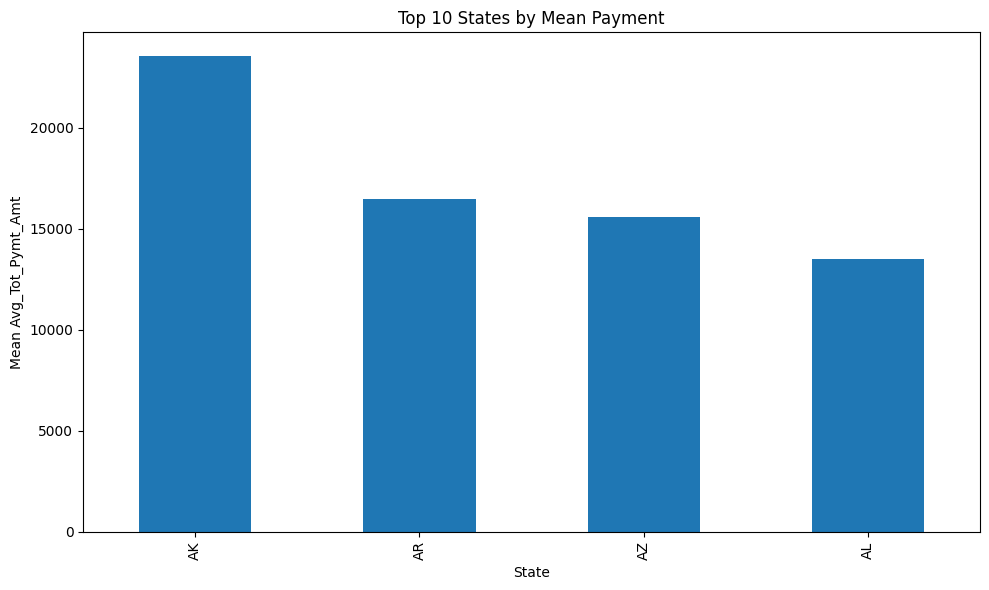


=== Top 10 Highest-Cost Cities ===
                mean_payment  mean_rating
facility_city                            
FLAGSTAFF       27548.644009    72.000000
JUNEAU          25297.122165    73.000000
PALMER          23674.133213    69.000000
ANCHORAGE       23621.654110    71.357143
FAIRBANKS       23280.763794    70.000000
LITTLE ROCK     21946.249921    67.605536
SOLDOTNA        21596.161537    71.000000
SILOAM SPRINGS  20927.349378    69.000000
MOBILE          20887.637778    65.930233
PHENIX CITY     19875.722311    88.000000

=== Top 10 Lowest-Cost Cities ===
               mean_payment  mean_rating
facility_city                           
EVERGREEN       7471.222583         68.0
PRATTVILLE      7799.786436         72.0
HALEYVILLE      8152.341990         83.0
WINFIELD        8180.105744         75.0
SAHUARITA       8264.858167         67.0
MONTICELLO      8331.189801         66.0
DANVILLE        8352.214215         79.0
ENTERPRISE      8449.575826         65.0
SHEFFIELD      

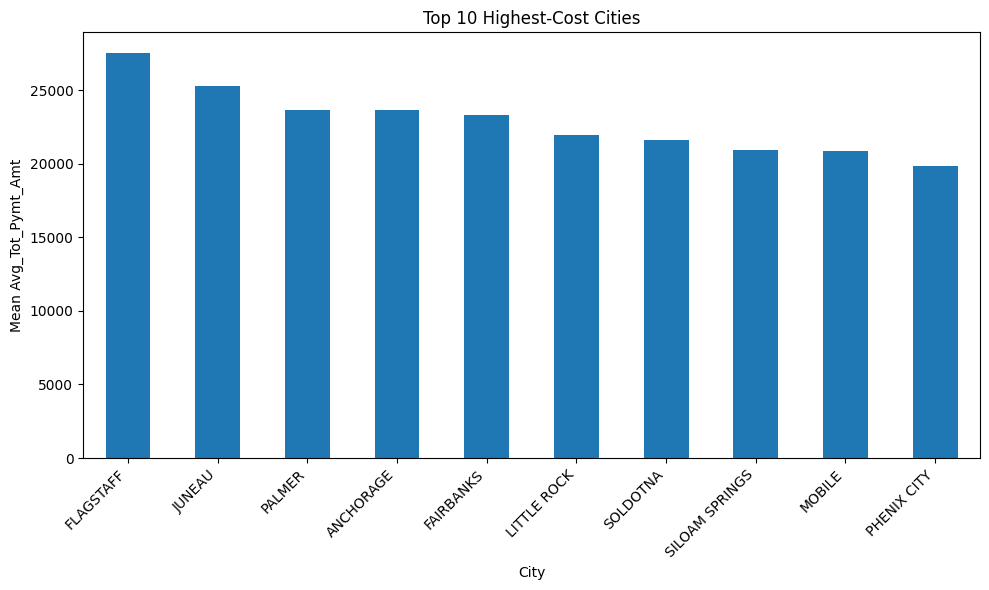

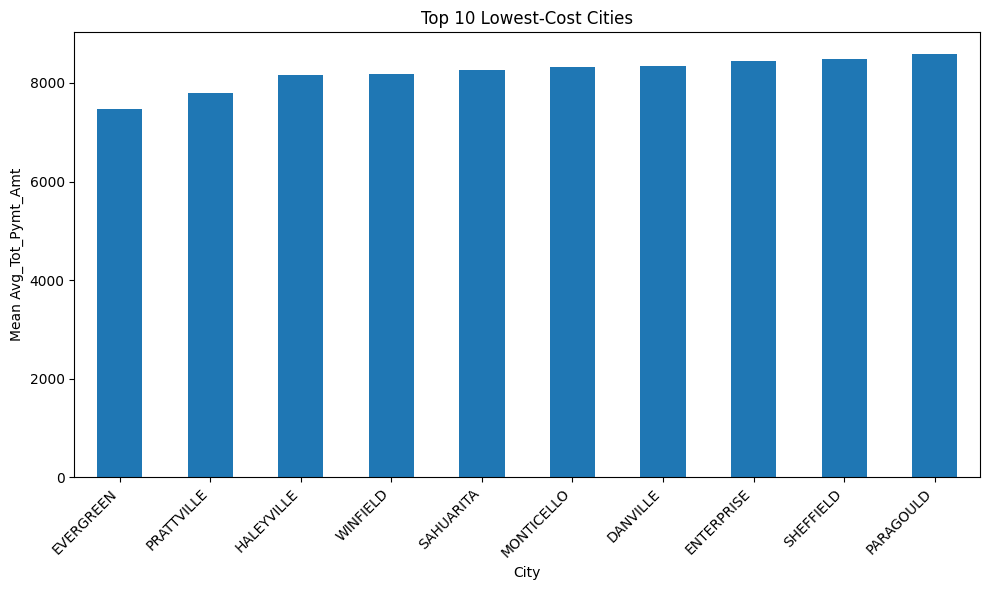


=== Mean Payment & Rating by RUCA Category ===
                                                    mean_payment  mean_rating
Rndrng_Prvdr_RUCA_Desc                                                       
Secondary flow 30% to <50% to a urbanized area ...  20143.263012    72.106312
Metropolitan area core: primary flow within an ...  15735.771750    65.486419
Secondary flow 30% to <50% to a larger urbanize...  13236.218679    71.000000
Micropolitan area core: primary flow within an ...  12301.063418    65.193878
Metropolitan area high commuting: primary flow ...  12130.808773    58.972626
Metropolitan area low commuting: primary flow 1...  12042.681387    74.222222
Unknown                                             11597.585628    69.000000
Small town low commuting: primary flow 10% to <...  10689.313957    60.946429
Small town core: primary flow within an urban c...  10300.782203    70.305759
Micropolitan high commuting: primary flow 30% o...   9510.508072    69.014134
Rural areas: pri

C:\Users\yash\AppData\Local\Temp\ipykernel_5344\4241972231.py:95: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


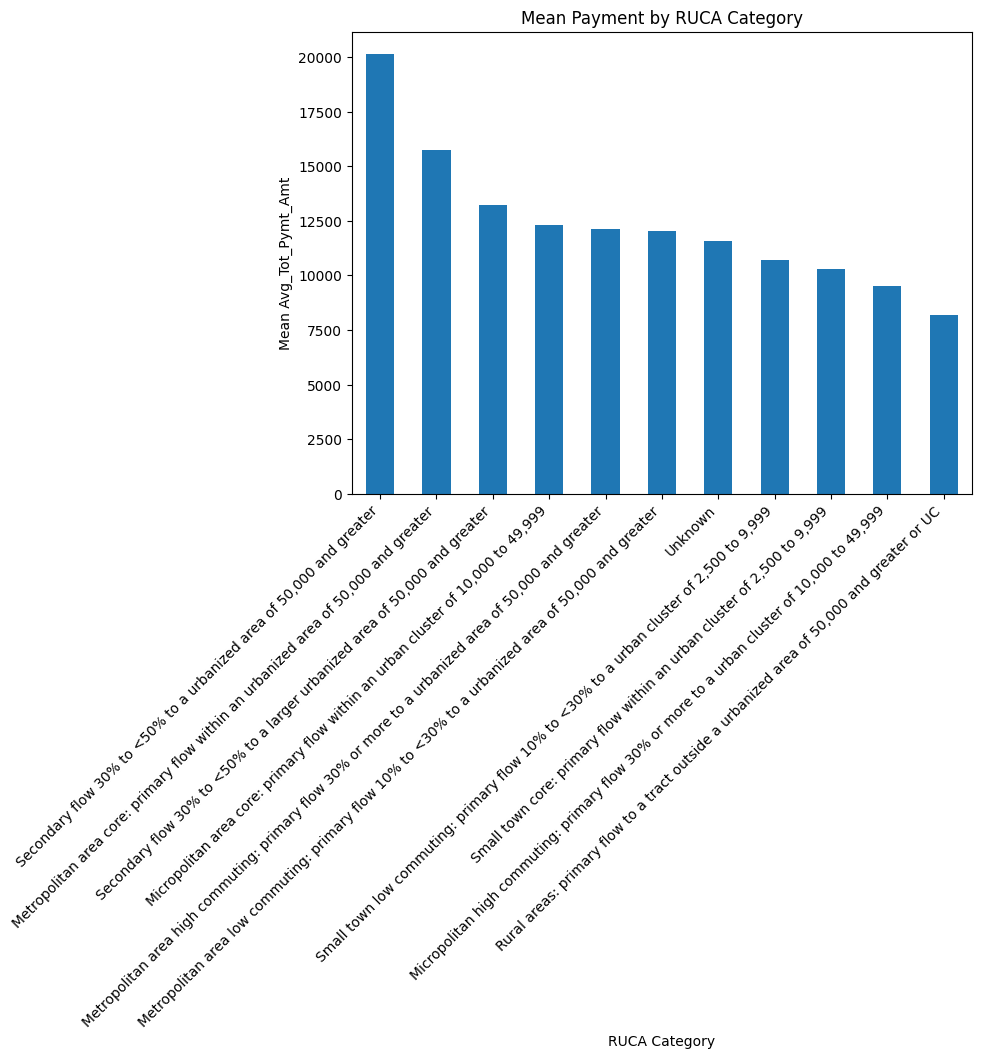

                mean_payment  mean_rating
facility_state                           
AK              23547.380435    70.797619
AR              16459.258912    66.480429
AZ              15596.217768    63.531527
AL              13481.318803    67.072819
               mean_payment  mean_rating
facility_city                           
FLAGSTAFF      27548.644009    72.000000
JUNEAU         25297.122165    73.000000
PALMER         23674.133213    69.000000
ANCHORAGE      23621.654110    71.357143
FAIRBANKS      23280.763794    70.000000
               mean_payment  mean_rating
facility_city                           
EVERGREEN       7471.222583         68.0
PRATTVILLE      7799.786436         72.0
HALEYVILLE      8152.341990         83.0
WINFIELD        8180.105744         75.0
SAHUARITA       8264.858167         67.0
                                                    mean_payment  mean_rating
Rndrng_Prvdr_RUCA_Desc                                                       
Secondary flow 30%

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def geographic_analysis(df: pd.DataFrame):
    """
    1. State-level aggregation: mean payment & rating; bar chart.
    2. City-level: top-10 highest & lowest cost cities; bar charts.
    3. RUCA category (rural vs. urban) comparison; bar chart.
    
    Returns:
        state_stats: DataFrame with mean_payment & mean_rating per state
        top10_high_cities: DataFrame of top-10 highest-cost cities
        top10_low_cities: DataFrame of top-10 lowest-cost cities
        ruca_stats: DataFrame with mean_payment & mean_rating per RUCA category
    """
    # ——— 1. State-level aggregation ———
    state_stats = (
        df
        .groupby('facility_state')
        .agg(
            mean_payment=('Avg_Tot_Pymt_Amt', 'mean'),
            mean_rating=('rating', 'mean')
        )
        .sort_values('mean_payment', ascending=False)
    )
    print("\n=== State-Level Mean Payment & Rating ===")
    print(state_stats.head(10))
    
    # Bar chart: top 10 states by mean payment
    state_stats['mean_payment'].head(10).plot(
        kind='bar', figsize=(10, 6), title='Top 10 States by Mean Payment'
    )
    plt.ylabel('Mean Avg_Tot_Pymt_Amt')
    plt.xlabel('State')
    plt.tight_layout()
    plt.show()
    
    # ——— 2. City-level high/low cost ———
    city_stats = (
        df
        .groupby('facility_city')
        .agg(
            mean_payment=('Avg_Tot_Pymt_Amt', 'mean'),
            mean_rating=('rating', 'mean')
        )
        .dropna()
    )
    top10_high_cities = city_stats.nlargest(10, 'mean_payment')
    top10_low_cities  = city_stats.nsmallest(10, 'mean_payment')
    
    print("\n=== Top 10 Highest-Cost Cities ===")
    print(top10_high_cities)
    print("\n=== Top 10 Lowest-Cost Cities ===")
    print(top10_low_cities)
    
    # Bar charts: top/high and low cost cities
    top10_high_cities['mean_payment'].plot(
        kind='bar', figsize=(10, 6), title='Top 10 Highest-Cost Cities'
    )
    plt.ylabel('Mean Avg_Tot_Pymt_Amt')
    plt.xlabel('City')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    top10_low_cities['mean_payment'].plot(
        kind='bar', figsize=(10, 6), title='Top 10 Lowest-Cost Cities'
    )
    plt.ylabel('Mean Avg_Tot_Pymt_Amt')
    plt.xlabel('City')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # ——— 3. RUCA category comparison ———
    ruca_stats = (
        df
        .groupby('Rndrng_Prvdr_RUCA_Desc')
        .agg(
            mean_payment=('Avg_Tot_Pymt_Amt', 'mean'),
            mean_rating=('rating', 'mean')
        )
        .sort_values('mean_payment', ascending=False)
    )
    print("\n=== Mean Payment & Rating by RUCA Category ===")
    print(ruca_stats)
    
    # Bar chart: RUCA mean payment
    ruca_stats['mean_payment'].plot(
        kind='bar', figsize=(8, 6), title='Mean Payment by RUCA Category'
    )
    plt.ylabel('Mean Avg_Tot_Pymt_Amt')
    plt.xlabel('RUCA Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return state_stats, top10_high_cities, top10_low_cities, ruca_stats

# Run the geographic analysis
state_stats, top10_high_cities, top10_low_cities, ruca_stats = geographic_analysis(df)
print(state_stats.head())
print(top10_high_cities.head())
print(top10_low_cities.head())
print(ruca_stats.head())

# Outlier detection

In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

def outlier_anomaly_detection(
    df: pd.DataFrame,
    numeric_cols: list[str] | None = None,
    method: str = "iqr",
    contamination: float = 0.01
) -> pd.DataFrame:
    """
    1. Flags univariate outliers using the IQR method.
    2. Flags multivariate anomalies using Isolation Forest.
    Adds two boolean columns to the DataFrame:
      - 'outlier_iqr': True if any numeric value is outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
      - 'anomaly_iforest': True if detected as anomaly by IsolationForest
    Returns the DataFrame with these two new columns.
    """
    df = df.copy()
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include="number").columns.tolist()
    # Ensure no NaNs for the methods below
    df_numeric = df[numeric_cols].fillna(df[numeric_cols].median())

    # 1. Univariate IQR outlier detection
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Flag rows where any col is outside the [lower, upper] range
    outlier_mask = ((df_numeric < lower) | (df_numeric > upper)).any(axis=1)
    df["outlier_iqr"] = outlier_mask
    print(f"Univariate IQR outliers detected: {outlier_mask.sum()} rows")

    # 2. Multivariate anomaly detection via Isolation Forest
    iso = IsolationForest(contamination=contamination, random_state=42)
    preds = iso.fit_predict(df_numeric)
    # In sklearn IF, -1 = anomaly, 1 = normal
    anomaly_mask = (preds == -1)
    df["anomaly_iforest"] = anomaly_mask
    print(f"IsolationForest anomalies detected (contamination={contamination}): {anomaly_mask.sum()} rows")

    return df

# Run the outlier/anomaly detection
result = outlier_anomaly_detection(
    df,
    numeric_cols=None,
    method="iqr",
    contamination=0.01
)

# Print the number of detected outliers and anomalies
print(result[['outlier_iqr', 'anomaly_iforest']].sum())

Univariate IQR outliers detected: 139342 rows
IsolationForest anomalies detected (contamination=0.01): 3075 rows
outlier_iqr        139342
anomaly_iforest      3075
dtype: int64


In [32]:
import pandas as pd

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds engineered features to the DataFrame:
      - cost_to_payment_ratio: Avg_Tot_Pymt_Amt / Avg_Submtd_Cvrd_Chrg
      - payment_per_discharge: Avg_Mdcr_Pymt_Amt / Tot_Dschrgs
      - DRG_category: first two characters of DRG_Cd (high-level grouping)
      - high_cost: True if Avg_Tot_Pymt_Amt > 75th percentile
      - high_quality: True if rating >= 4
    Returns a new DataFrame with these columns added.
    """
    df = df.copy()

    # 1. Cost-to-payment ratio
    if 'Avg_Tot_Pymt_Amt' in df.columns and 'Avg_Submtd_Cvrd_Chrg' in df.columns:
        df['cost_to_payment_ratio'] = (
            df['Avg_Tot_Pymt_Amt'] / df['Avg_Submtd_Cvrd_Chrg']
        )

    # 2. Payment per discharge
    if 'Avg_Mdcr_Pymt_Amt' in df.columns and 'Tot_Dschrgs' in df.columns:
        df['payment_per_discharge'] = (
            df['Avg_Mdcr_Pymt_Amt'] / df['Tot_Dschrgs']
        )

    # 3. High-level DRG grouping by first two characters
    if 'DRG_Cd' in df.columns:
        df['DRG_category'] = df['DRG_Cd'].astype(str).str[:2]

    # 4. Binary flags
    if 'Avg_Tot_Pymt_Amt' in df.columns:
        q75 = df['Avg_Tot_Pymt_Amt'].quantile(0.75)
        df['high_cost'] = df['Avg_Tot_Pymt_Amt'] > q75

    if 'rating' in df.columns:
        df['high_quality'] = df['rating'] >= 4

    return df

# Run the feature engineering
df_feats = feature_engineering(df)
df_feats.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,...,start_date,end_date,city,name,rating,cost_to_payment_ratio,payment_per_discharge,DRG_category,high_cost,high_quality
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,2020-07-01,2023-06-30,Dothan,southeast health medical center,70.0,0.235465,1413.3184,23,True,True
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,2020-07-01,2023-06-30,Enterprise,southeast health medical center,70.0,0.235465,1413.3184,23,True,True
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,2020-07-01,2023-06-30,Eufaula,southeast health medical center,70.0,0.235465,1413.3184,23,True,True
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,2020-07-01,2023-06-30,Geneva,southeast health medical center,70.0,0.235465,1413.3184,23,True,True
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,2020-07-01,2023-06-30,Ozark,southeast health medical center,70.0,0.235465,1413.3184,23,True,True


e:\MS\DSCI510\Healthcare_analysis\.venv\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['value_of_care_display_id']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


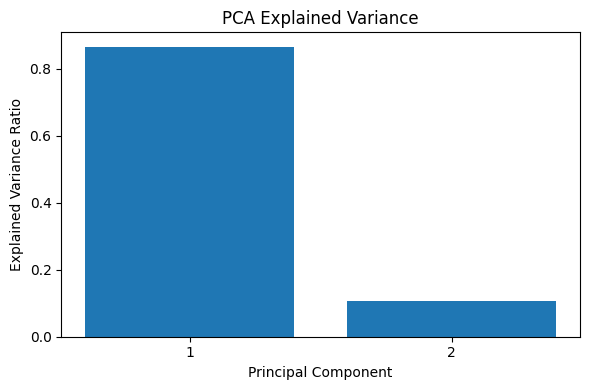

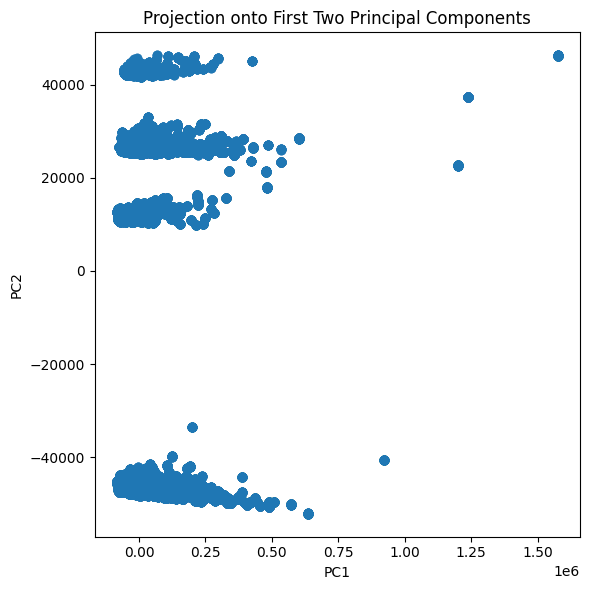

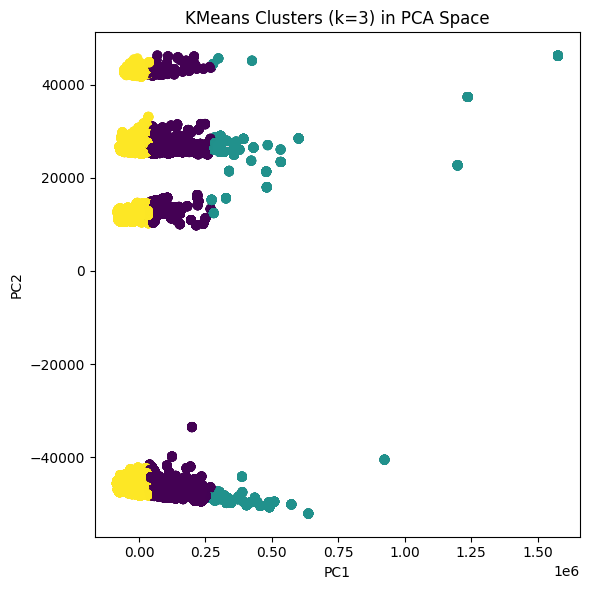

            PC1           PC2  cluster
0  76314.636164 -44174.465692        0
1  76314.636164 -44174.465692        0
2  76314.636164 -44174.465692        0
3  76314.636164 -44174.465692        0
4  76314.636164 -44174.465692        0


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

def multivariate_dimensionality_reduction(
    df: pd.DataFrame,
    n_components: int = 2,
    n_clusters: int = 3
) -> pd.DataFrame:
    """
    1. Imputes missing numeric values via median.
    2. Performs PCA on all numeric columns (with guards for zero rows).
    3. Plots explained variance, 2-D projection, and KMeans clusters.
    Returns a DataFrame with PC coordinates and cluster labels (empty if skipped).
    """
    # 1. Select numeric columns
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    X_raw = df[numeric_cols]

    # 2. Check for zero rows
    if X_raw.shape[0] == 0:
        print("⚠️ No rows in the dataset—skipping PCA and clustering.")
        return pd.DataFrame()

    # 3. Impute missing values
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X_raw)

    # 4. Adjust components if too many samples
    n_samples = X.shape[0]
    if n_samples < n_components:
        print(f"⚠️ Only {n_samples} samples available; reducing n_components→{n_samples}")
        n_components = n_samples

    # 5. PCA
    pca = PCA(n_components=n_components, random_state=42)
    pcs = pca.fit_transform(X)
    pc_cols = [f"PC{i+1}" for i in range(n_components)]
    df_pca = pd.DataFrame(pcs, columns=pc_cols, index=df.index)

    # 6. Explained variance plot
    plt.figure(figsize=(6, 4))
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA Explained Variance")
    plt.xticks(range(1, n_components + 1))
    plt.tight_layout()
    plt.show()

    # 7. 2-D scatter if possible
    if n_components >= 2:
        plt.figure(figsize=(6, 6))
        plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Projection onto First Two Principal Components")
        plt.tight_layout()
        plt.show()

    # 8. KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_pca["cluster"] = kmeans.fit_predict(df_pca[pc_cols])

    # 9. Cluster plot
    if n_components >= 2:
        plt.figure(figsize=(6, 6))
        plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["cluster"], alpha=0.5)
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title(f"KMeans Clusters (k={n_clusters}) in PCA Space")
        plt.tight_layout()
        plt.show()

    return df_pca

# === Example usage ===
# Run the multivariate dimensionality reduction
df_pca = multivariate_dimensionality_reduction(df)
print(df_pca.head())

# Summary report

In [37]:
import pandas as pd

def summary_report(df: pd.DataFrame) -> None:
    """
    Loads merged_data.csv and prints key summary statistics:
      1. Top correlations between cost and quality.
      2. Top/bottom 5 states by mean payment and mean rating.
      3. Top 5 highest‐ and lowest‐cost cities (by avg payment) with their mean ratings.
      4. Counts of outliers and anomalies from previous flags (if present).
      5. Cluster size distribution from PCA/KMeans (if present).
    """
    # 1. Correlations
    num = df.select_dtypes(include="number")
    corr = num.corr()
    if "rating" in corr:
        print("\n=== Top 5 Positive Correlations with 'rating' ===")
        print(corr["rating"].drop("rating").sort_values(ascending=False).head(5))
        print("\n=== Top 5 Negative Correlations with 'rating' ===")
        print(corr["rating"].drop("rating").sort_values().head(5))

    # 2. State‐level payment & rating
    if {"facility_state", "Avg_Tot_Pymt_Amt", "rating"}.issubset(df.columns):
        state_stats = (
            df.groupby("facility_state")
              .agg(mean_payment=("Avg_Tot_Pymt_Amt","mean"),
                   mean_rating=("rating","mean"))
        )
        print("\n=== Top 5 States by Mean Payment ===")
        print(state_stats["mean_payment"].sort_values(ascending=False).head(5))
        print("\n=== Bottom 5 States by Mean Payment ===")
        print(state_stats["mean_payment"].sort_values().head(5))
        print("\n=== Top 5 States by Mean Rating ===")
        print(state_stats["mean_rating"].sort_values(ascending=False).head(5))
        print("\n=== Bottom 5 States by Mean Rating ===")
        print(state_stats["mean_rating"].sort_values().head(5))

    # 3. City‐level cost & rating
    if {"facility_city", "Avg_Tot_Pymt_Amt", "rating"}.issubset(df.columns):
        city_stats = (
            df.groupby("facility_city")
              .agg(mean_payment=("Avg_Tot_Pymt_Amt","mean"),
                   mean_rating=("rating","mean"))
              .dropna()
        )
        print("\n=== Top 5 Highest‐Cost Cities ===")
        print(city_stats["mean_payment"].sort_values(ascending=False).head(5))
        print("\n=== Top 5 Lowest‐Cost Cities ===")
        print(city_stats["mean_payment"].sort_values().head(5))

    # 4. Outlier/anomaly counts
    if "outlier_iqr" in df.columns:
        print(f"\nIQR Outliers: {df['outlier_iqr'].sum()} of {len(df)} rows")
    if "anomaly_iforest" in df.columns:
        print(f"IsolationForest Anomalies: {df['anomaly_iforest'].sum()} of {len(df)} rows")

    # 5. Cluster distribution
    if "cluster" in df.columns:
        print("\n=== Cluster Size Distribution ===")
        print(df["cluster"].value_counts().sort_index())

# Run the summary report
summary_report(df)


=== Top 5 Positive Correlations with 'rating' ===
payment_footnote     0.117271
Rndrng_Prvdr_RUCA    0.038776
Avg_Tot_Pymt_Amt     0.030169
Avg_Mdcr_Pymt_Amt    0.020394
Tot_Dschrgs          0.020013
Name: rating, dtype: float64

=== Top 5 Negative Correlations with 'rating' ===
Rndrng_Prvdr_Zip5         -0.186464
facility_zip              -0.186462
Rndrng_Prvdr_State_FIPS   -0.135208
Rndrng_Prvdr_CCN          -0.112825
payment                   -0.039831
Name: rating, dtype: float64

=== Top 5 States by Mean Payment ===
facility_state
AK    23547.380435
AR    16459.258912
AZ    15596.217768
AL    13481.318803
Name: mean_payment, dtype: float64

=== Bottom 5 States by Mean Payment ===
facility_state
AL    13481.318803
AZ    15596.217768
AR    16459.258912
AK    23547.380435
Name: mean_payment, dtype: float64

=== Top 5 States by Mean Rating ===
facility_state
AK    70.797619
AL    67.072819
AR    66.480429
AZ    63.531527
Name: mean_rating, dtype: float64

=== Bottom 5 States by Mean 

# Cost vs rating 

Overall

Pearson r = 0.038, p-value = 7.424e-97
Spearman ρ = 0.027, p-value = 1.425e-50


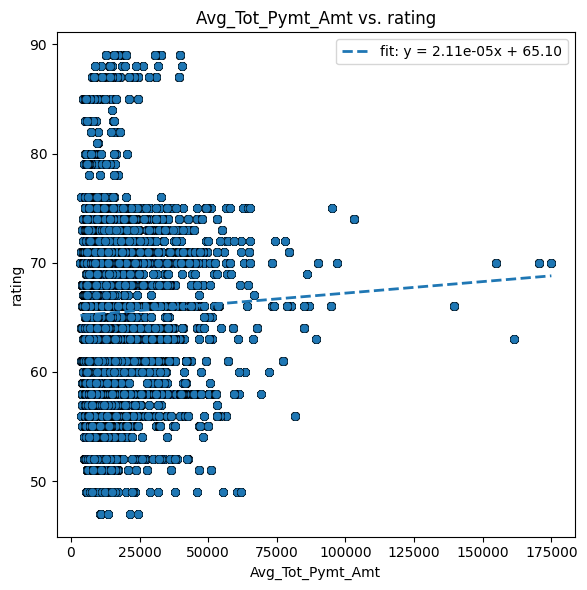

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def cost_rating_correlation(df: pd.DataFrame,
                            cost_col: str = "Avg_Tot_Pymt_Amt",
                            rating_col: str = "rating"):
    """
    1. Computes Pearson and Spearman correlations between cost and rating.
    2. Prints correlation coefficients and p-values.
    3. Plots a scatter of cost vs. rating with a linear fit line.
    """
    # 1. Drop rows with missing cost or rating    
    sub = df[[cost_col, rating_col]].dropna()
    cost = sub[cost_col].values
    rating = sub[rating_col].values

    # 2. Compute correlations
    pearson_r, pearson_p = stats.pearsonr(cost, rating)
    spearman_rho, spearman_p = stats.spearmanr(cost, rating)

    print(f"Pearson r = {pearson_r:.3f}, p-value = {pearson_p:.3e}")
    print(f"Spearman ρ = {spearman_rho:.3f}, p-value = {spearman_p:.3e}")

    # 3. Scatter + regression line
    plt.figure(figsize=(6, 6))
    plt.scatter(cost, rating, alpha=0.5, edgecolor='k', linewidth=0.3)
    # Fit least-squares line
    m, b = np.polyfit(cost, rating, 1)
    x_line = np.linspace(cost.min(), cost.max(), 100)
    plt.plot(x_line, m * x_line + b, linestyle='--', linewidth=2,
             label=f"fit: y = {m:.2e}x + {b:.2f}")
    plt.xlabel(cost_col)
    plt.ylabel(rating_col)
    plt.title(f"{cost_col} vs. {rating_col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Corelation ===
# Removal of outliers
corelation_df = df[df['Avg_Tot_Pymt_Amt'] < 200000]
# Run the cost-rating correlation analysis
cost_rating_correlation(corelation_df)

In [44]:
df['Avg_Mdcr_Pymt_Amt'].describe()

count    307620.000000
mean      12781.115577
std       15415.086684
min        1995.333333
25%        5659.261905
50%        9033.500000
75%       14145.625000
max      511923.850000
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

State wise

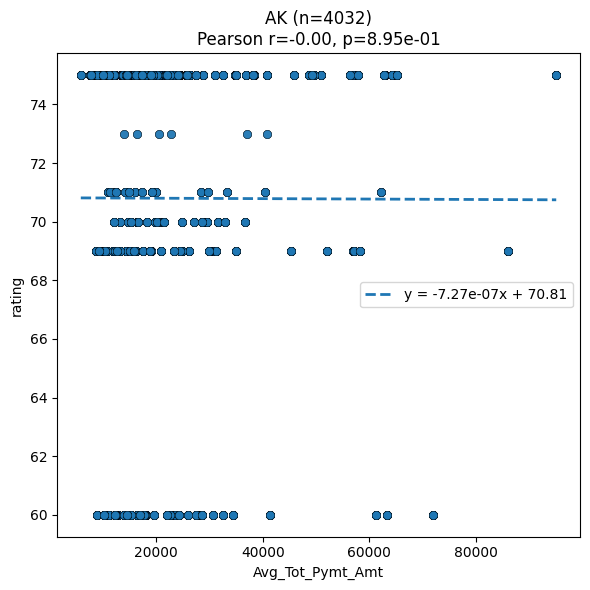

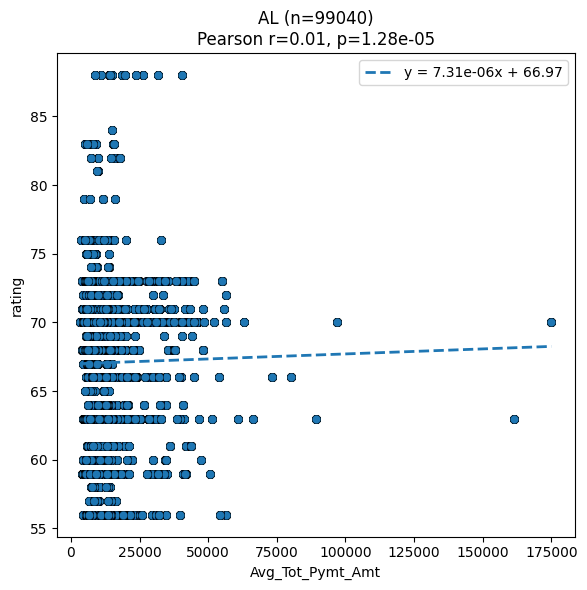

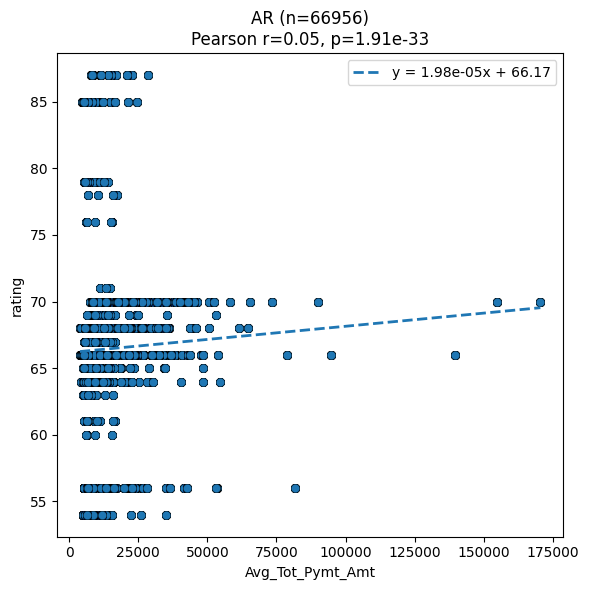

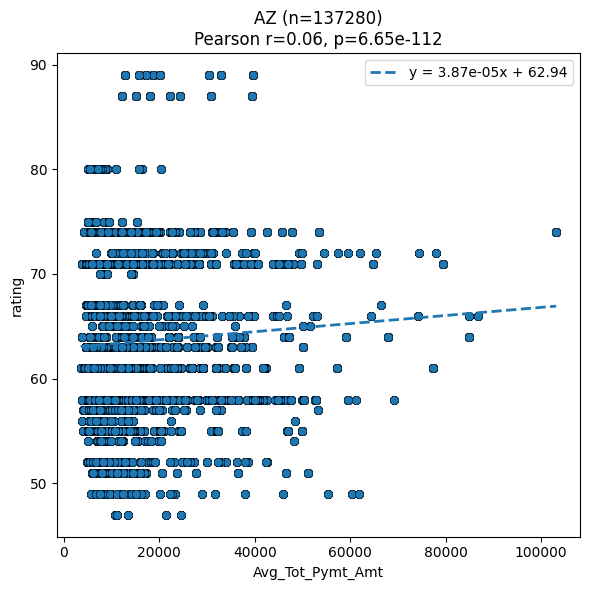


=== State‐Level Correlation Metrics ===
state      n pearson_r pearson_p spearman_rho spearman_p
   AZ 137280     0.061 6.65e-112        0.046   6.51e-66
   AR  66956     0.047  1.91e-33        0.201   0.00e+00
   AL  99040     0.014  1.28e-05        0.007   3.72e-02
   AK   4032    -0.002  8.95e-01       -0.021   1.75e-01


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def state_cost_rating_analysis(
    df: pd.DataFrame,
    cost_col: str = "Avg_Tot_Pymt_Amt",
    rating_col: str = "rating",
    min_count: int = 20
) -> pd.DataFrame:
    """
    For each state with at least `min_count` valid cost–rating pairs:
      1. Computes Pearson and Spearman correlations.
      2. Fits a least-squares regression line.
      3. Plots cost vs. rating scatter with the regression line and annotates r & p.
    Returns a DataFrame of state‐level metrics:
      state, n, pearson_r, pearson_p, spearman_rho, spearman_p, slope, intercept
    """
    records = []
    for state, group in df.groupby("facility_state"):
        sub = group[[cost_col, rating_col]].dropna()
        n = len(sub)
        if n < min_count:
            continue

        cost = sub[cost_col].values
        rating = sub[rating_col].values

        # Correlations
        pearson_r, pearson_p = stats.pearsonr(cost, rating)
        spearman_rho, spearman_p = stats.spearmanr(cost, rating)

        # Regression fit
        slope, intercept = np.polyfit(cost, rating, 1)
        x_line = np.linspace(cost.min(), cost.max(), 100)

        # Plot
        plt.figure(figsize=(6, 6))
        plt.scatter(cost, rating, alpha=0.5, edgecolor="k", linewidth=0.3)
        plt.plot(x_line, slope * x_line + intercept,
                 linestyle="--", linewidth=2,
                 label=f"y = {slope:.2e}x + {intercept:.2f}")
        plt.xlabel(cost_col)
        plt.ylabel(rating_col)
        plt.title(f"{state} (n={n})\nPearson r={pearson_r:.2f}, p={pearson_p:.2e}")
        plt.legend()
        plt.tight_layout()
        plt.show()

        records.append({
            "state": state,
            "n": n,
            "pearson_r": pearson_r,
            "pearson_p": pearson_p,
            "spearman_rho": spearman_rho,
            "spearman_p": spearman_p,
            "slope": slope,
            "intercept": intercept
        })

    results = pd.DataFrame(records).sort_values("pearson_r", ascending=False)
    print("\n=== State‐Level Correlation Metrics ===")
    print(results[["state","n","pearson_r","pearson_p","spearman_rho","spearman_p"]]
          .to_string(index=False,
                     formatters={
                         "pearson_r":"{:.3f}".format,
                         "pearson_p":"{:.2e}".format,
                         "spearman_rho":"{:.3f}".format,
                         "spearman_p":"{:.2e}".format
                     }))
    return results

# === State corelation analysis ===
state_metrics = state_cost_rating_analysis(corelation_df, min_count=20)